# Introduction

In this notebook two datased will be analysed, one with experimental and one wieth the simulated data. of similar building.
The experiment and simulation were conducted in a small size commercial building in Iowa during summer, winter, and transition season. 

Dataset contains following data:

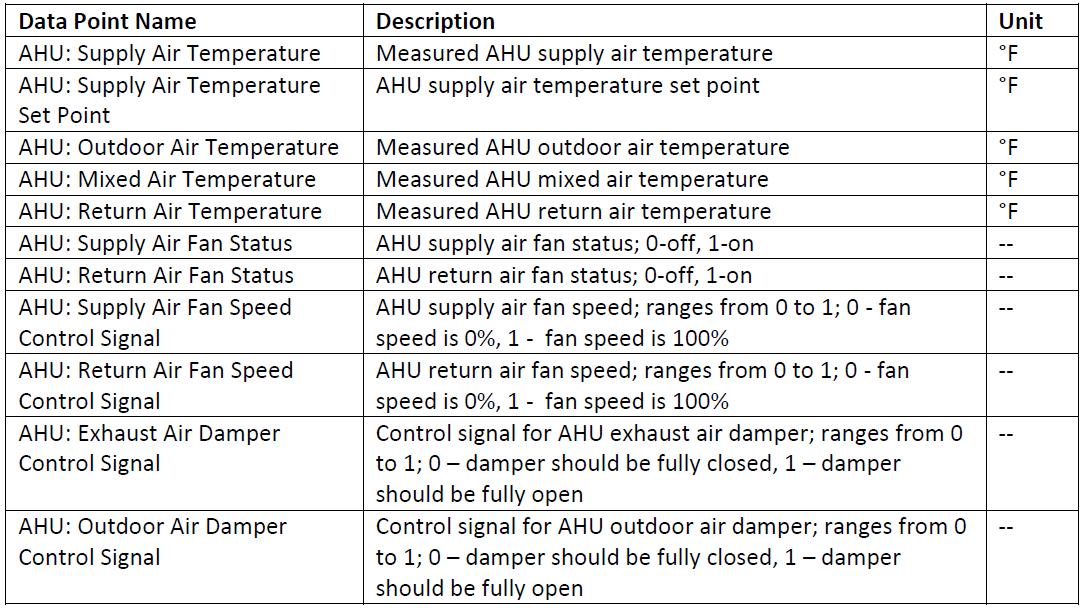
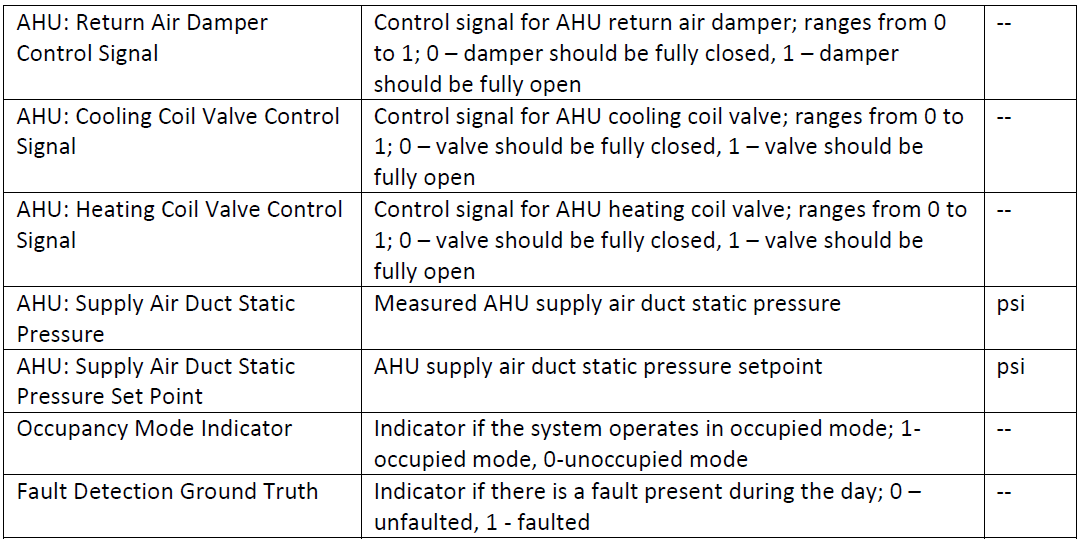


The faults in the real building were manually imposed for one day into the control system as in the table below:

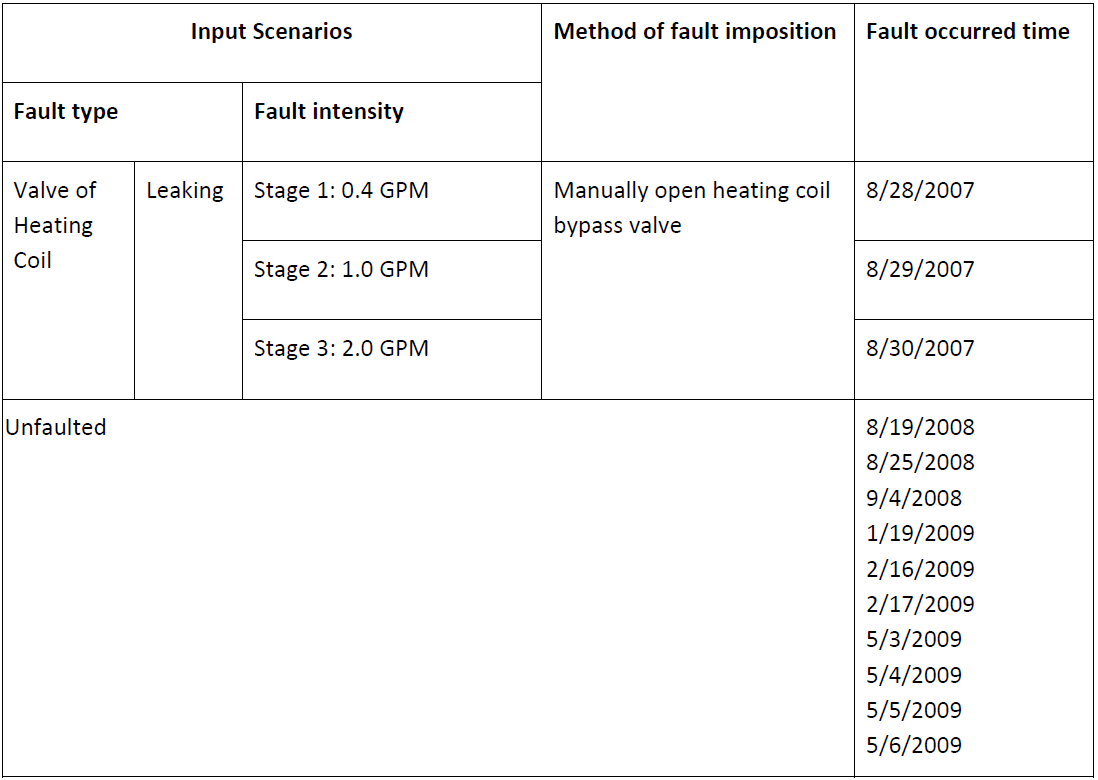

Faults imposed in the simulation were also manually imposed for one day as in the table below:

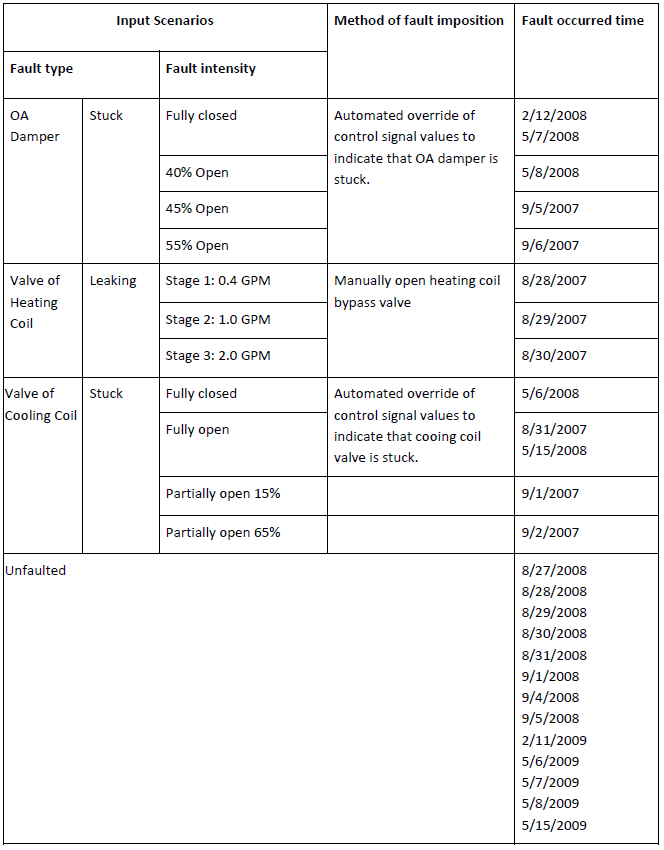

We can see that there is more types of faults in simulated dataset. There is the same fault in experimental and simulated dataset, which brings opportunity to compare models created with diffrent tools.

# Experimental dataset

## Data exploration and feature engineering

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings

In [124]:
warnings.filterwarnings("ignore")

In [125]:
raw_data_exp = pd.read_csv('MZVAV-2-1.csv')

In [126]:
raw_data_exp.sample(5)

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Exhaust Air Damper Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
19368,5/30/2009 10:48,54.61,55,63.68,66.12,72.71,1,1,0.72,0.58,1.0,1.0,1.0,0.25,0.0,1.4,1.40,1,0
4920,8/19/2008 10:00,54.93,55,78.28,74.07,72.81,1,1,0.70,0.56,0.4,0.4,0.4,0.42,0.0,1.4,1.39,1,0
6872,8/25/2008 18:32,59.67,55,77.24,69.51,73.55,0,0,0.20,0.20,0.0,0.0,0.0,0.00,0.0,1.4,0.00,0,0
17172,5/5/2009 22:12,69.79,55,59.42,66.86,71.45,0,0,0.20,0.20,0.0,0.0,0.0,0.00,0.0,1.4,0.00,0,0
15688,5/4/2009 21:28,69.14,55,50.57,64.74,70.81,0,0,0.20,0.20,0.0,0.0,0.0,0.00,0.0,1.4,0.00,0,0


In [127]:
raw_data_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21600 entries, 0 to 21599
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Datetime                                        21600 non-null  object 
 1   AHU: Supply Air Temperature                     21600 non-null  float64
 2   AHU: Supply Air Temperature Set Point           21600 non-null  int64  
 3   AHU: Outdoor Air Temperature                    21600 non-null  float64
 4   AHU: Mixed Air Temperature                      21600 non-null  float64
 5   AHU: Return Air Temperature                     21600 non-null  float64
 6   AHU: Supply Air Fan Status                      21600 non-null  int64  
 7   AHU: Return Air Fan Status                      21600 non-null  int64  
 8   AHU: Supply Air Fan Speed Control Signal        21600 non-null  float64
 9   AHU: Return Air Fan Speed Control Signa

Dataset has no null values and object type columns so it doesn't need cleaning in this case, besides column "Datetime" with will be transformed to DateTime data format.

In [128]:
# Changing data type of the Datetime column
raw_data_exp['Datetime'] = pd.to_datetime(raw_data_exp['Datetime'])

In [129]:
raw_data_exp.describe()

,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Exhaust Air Damper Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
count,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,2.160000e+04,21600.000000,21600.000000,21600.000000
mean,62.996525,57.000463,58.220122,67.488618,72.611413,0.534722,0.533611,0.474657,0.398145,0.341757,0.331989,0.443025,0.168748,0.083330,1.400000e+00,0.738494,0.500000,0.133333
std,7.372700,4.000440,21.458405,7.875141,1.679548,0.498804,0.498881,0.261236,0.189342,0.372642,0.368341,0.400821,0.252140,0.249985,5.278122e-13,0.695622,0.500012,0.339943
min,0.000000,55.000000,-0.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000e+00,0.000000,0.000000,0.000000
25%,55.150000,55.000000,44.980000,64.100000,71.340000,0.000000,0.000000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000e+00,0.000000,0.000000,0.000000
50%,64.840000,55.000000,63.640000,68.660000,72.810000,1.000000,1.000000,0.620000,0.500000,0.400000,0.400000,0.400000,0.000000,0.000000,1.400000e+00,1.340000,0.500000,0.000000
75%,70.430000,55.000000,74.550000,72.590000,73.440000,1.000000,1.000000,0.720000,0.570000,0.470000,0.470000,1.000000,0.290000,0.000000,1.400000e+00,1.390000,1.000000,0.000000
max,79.690000,65.000000,91.850000,108.240000,79.120000,1.000000,1.000000,1.000000,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.400000e+00,2.370000,1.000000,1.000000


Data seems to be cleaned. Now it's time to select relevant data for model building.

In [130]:
# Making copy of dataset for further data transformation
data_exp = raw_data_exp.copy()

We can see that the column "AHU: Supply Air Duct Static Pressure Set Point" has constant value therefore will be removed for the dataset.

In [131]:
data_exp.drop('AHU: Supply Air Duct Static Pressure Set Point', axis=1, inplace=True)

<AxesSubplot:>

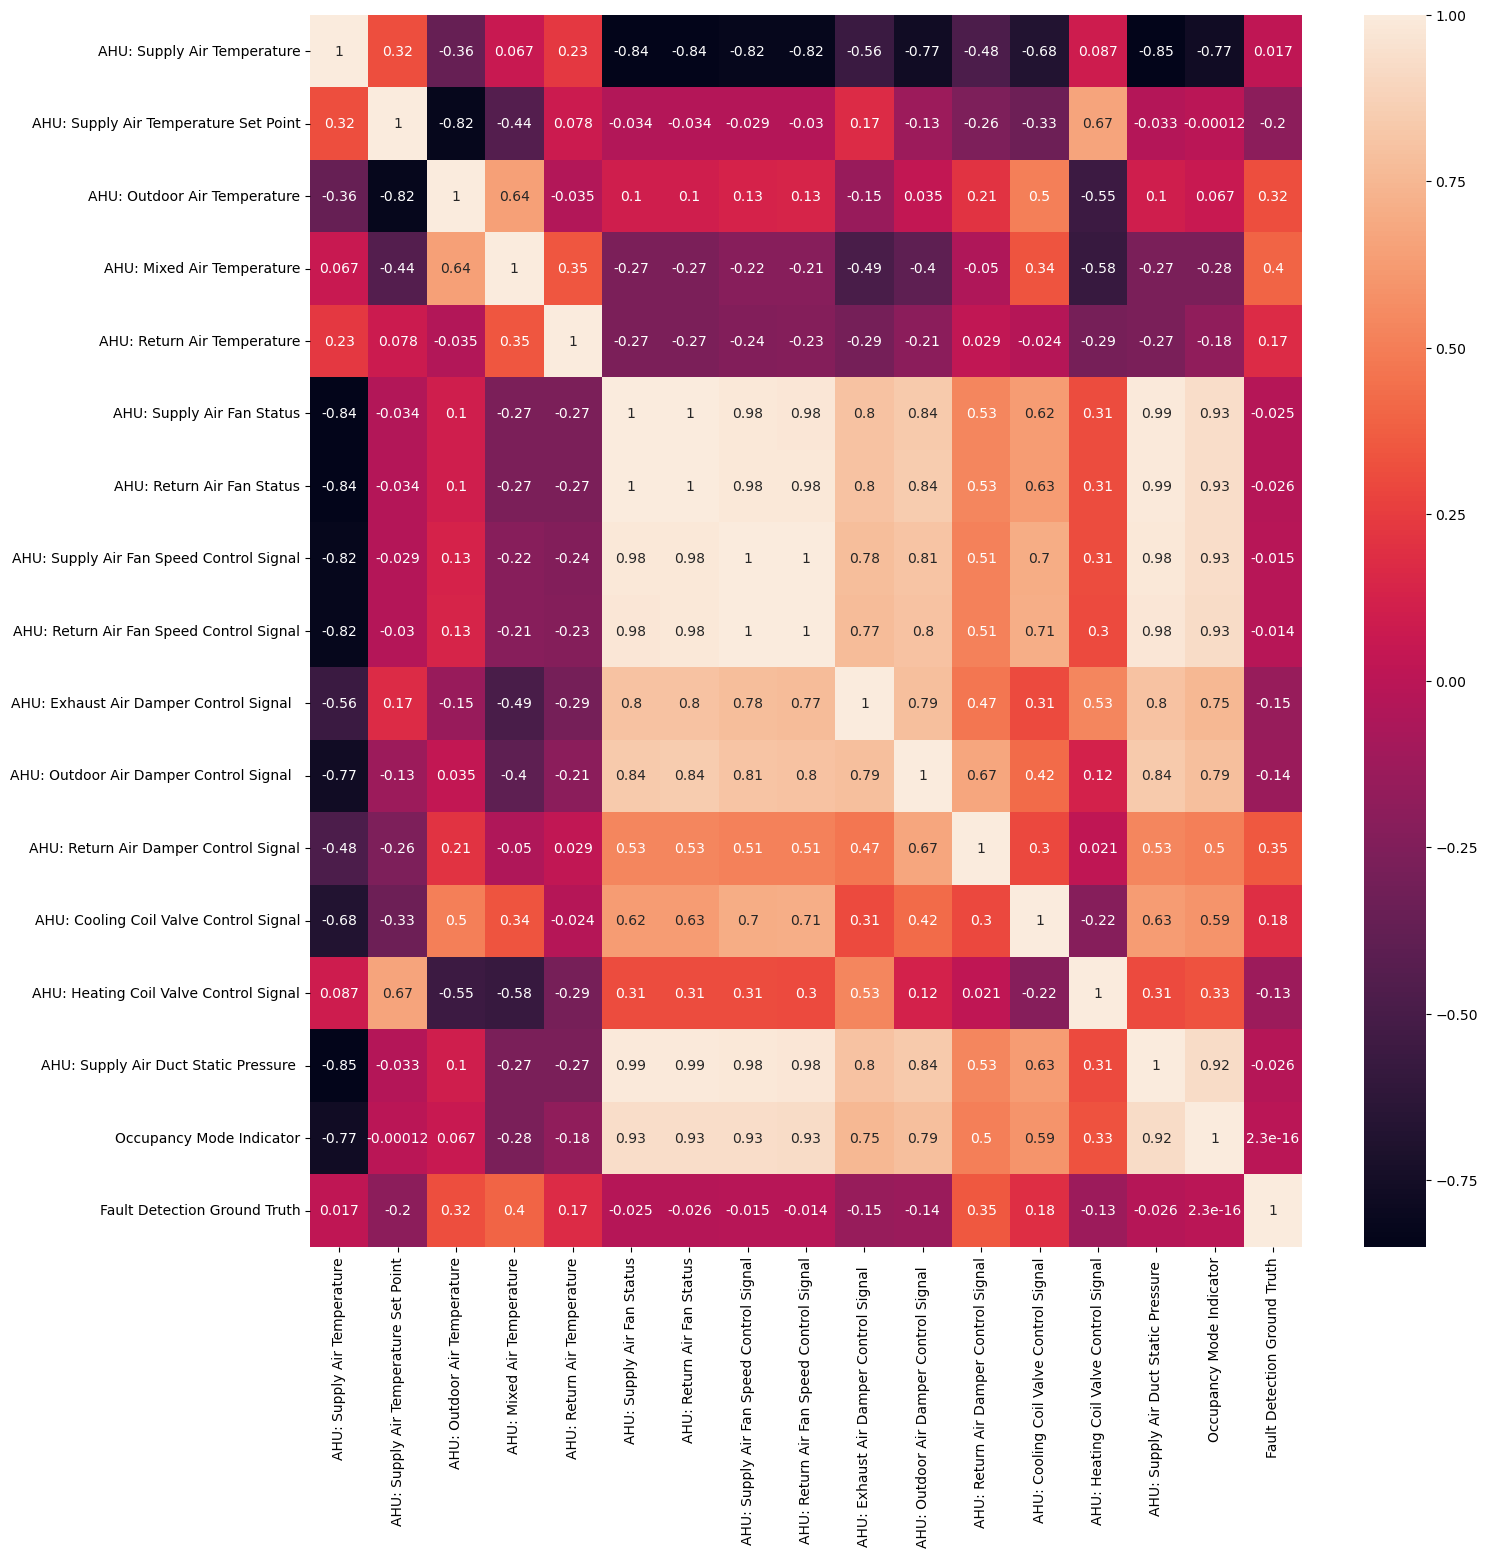

In [132]:
plt.figure(figsize=(16,16))
sns.heatmap(data_exp.corr(), annot=True)

We can see that 5 of the columns: "AHU: Supply Air Fan Status", "AHU: Return Air Fan Status", "AHU: Supply Air Fan Speed Control Signal", "AHU: Return Air Fan Speed Control Signal", "AHU: Supply Air Duct Static Pressure" are highly correlated and it is probably due to control sequence. To avoid multicollinearity we can left only one. In the description of the dataset we can see that during unoccupied mode fans are turned off and we can also see that occupancy mode indicator is highly correlated with supply air fan status so we can drop this column also.

In [133]:
data_exp.drop(['AHU: Return Air Fan Status', 'AHU: Supply Air Fan Speed Control Signal','AHU: Return Air Fan Speed Control Signal',
                 'AHU: Supply Air Duct Static Pressure ', 'Occupancy Mode Indicator'], axis=1, inplace=True)

<AxesSubplot:>

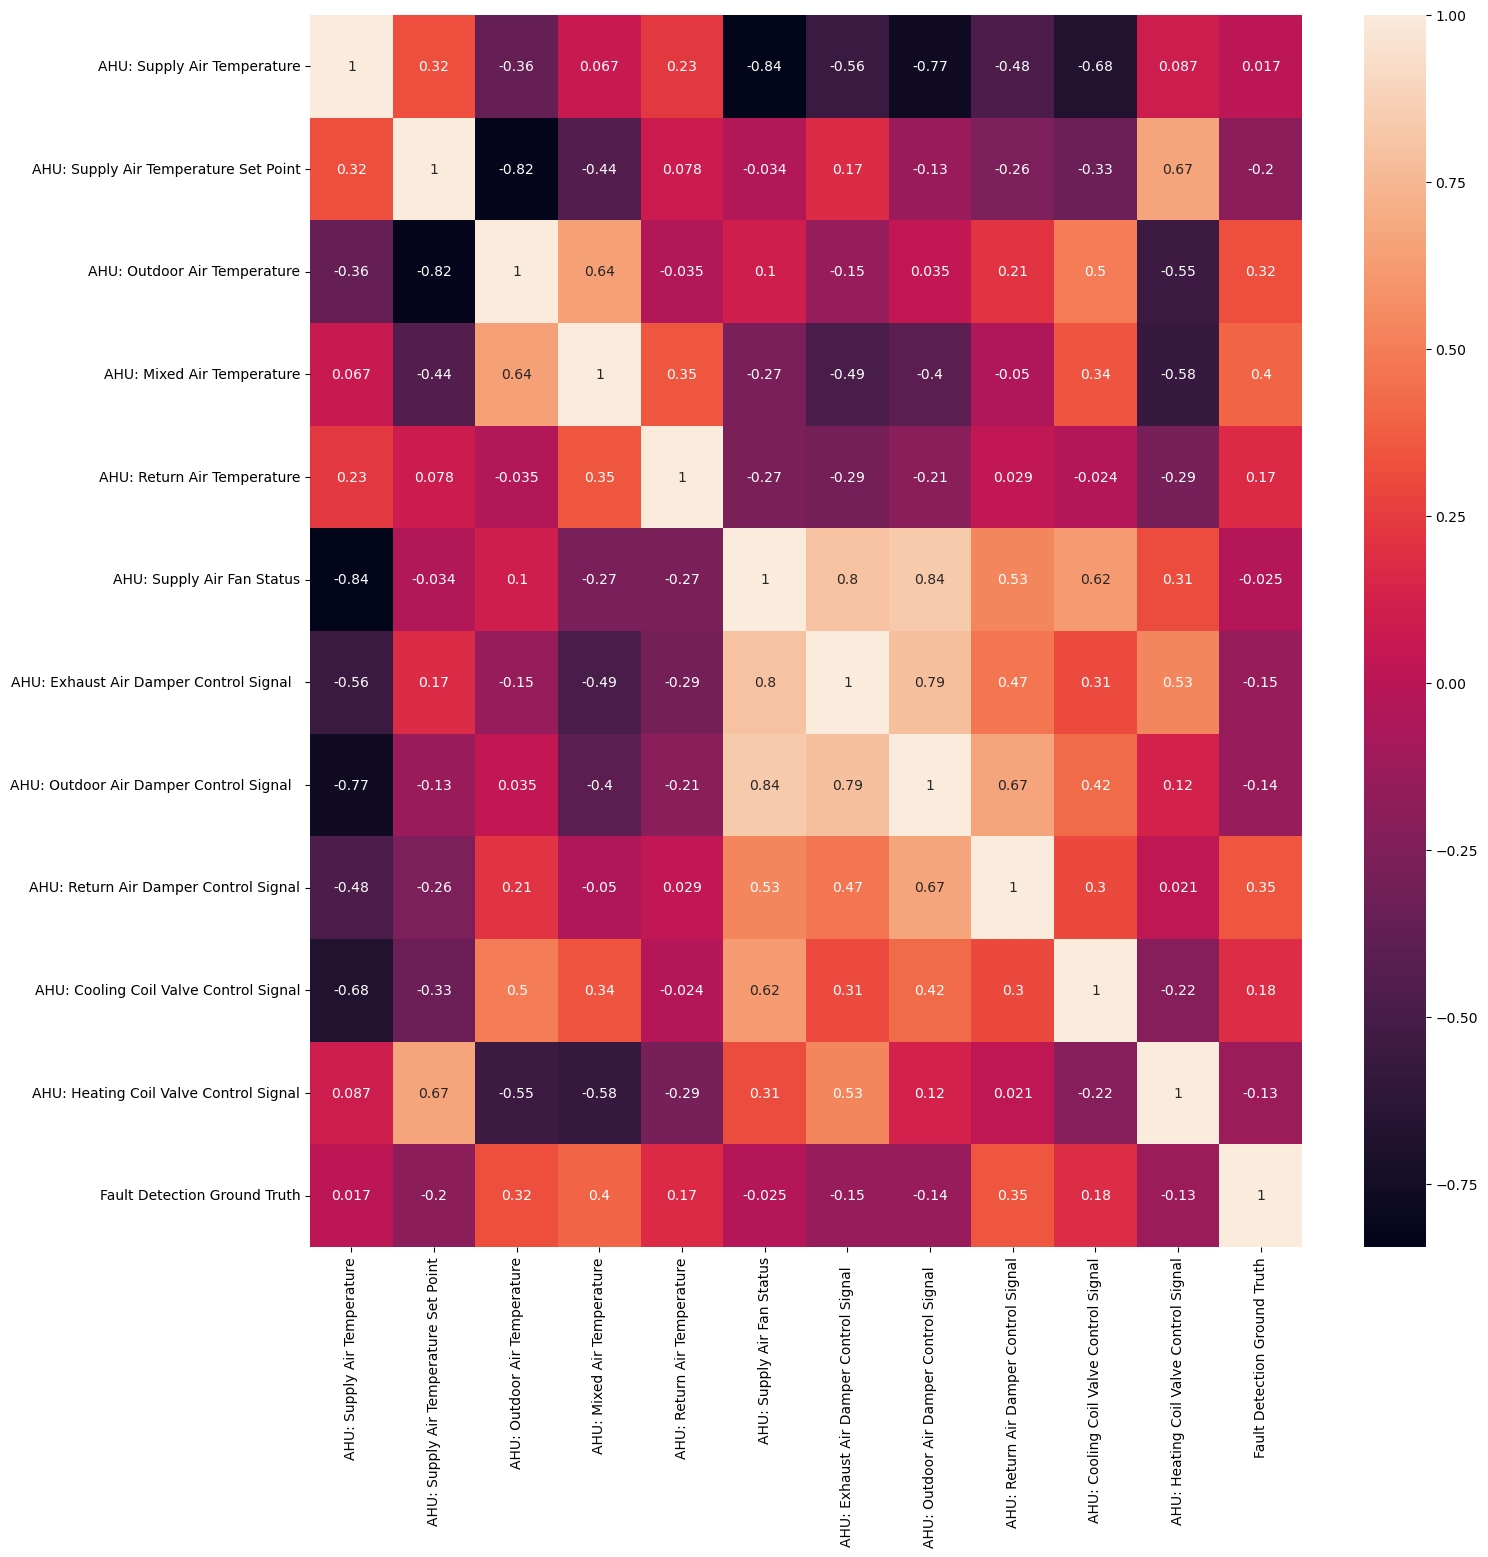

In [134]:
plt.figure(figsize=(16,16))
sns.heatmap(data_exp.corr(), annot=True)

Dataset seems to be ready for model building. We can also see that this time column "Fault Detection Ground Truth" is correlated with some of the columns, that means that it will be good target for classification algorithm.

## Model building

### Feature and target data preparation

In [135]:
X_exp = data_exp.drop(['Datetime','Fault Detection Ground Truth'], axis=1)

In [136]:
y_exp = data_exp['Fault Detection Ground Truth']

### Train test split

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_exp, test_size=0.1, shuffle=True)

### Classification model training

In [139]:
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [140]:
# preparing list of classifiacation algorithms for comparison and to choose the best one
classifiers = [['KNeighborsClassifier', KNeighborsClassifier()],
              ['MLPClassifier',MLPClassifier()],
              ['AdaBoostClassifier',AdaBoostClassifier()],
              ['GradientBoostingClassifier',GradientBoostingClassifier()],
              ['CatBoostClassifier', CatBoostClassifier()],
              ['XGBClassifier', XGBClassifier()],
              ['BaggingClassifier', BaggingClassifier()],
              ['RandomForestClassifier', RandomForestClassifier()],
              ['DecisionTreeClassifier', DecisionTreeClassifier()],
              ['LogisticRegression', LogisticRegression()]]

In [141]:
# preparing DataFrame to store model evauation parameters
Acc_exp = pd.DataFrame(index=None, columns=['model','train_accuracy','test_accuracy','train_precision','test_precision',
                                        'train_recall','test_recall','train_f1','test_f1'])

In [144]:
# creating the loop to train and evaluate each model
models_exp = []
for mod in classifiers:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train_exp,y_train_exp)
    models_exp.append(model)
    y_pred_train = model.predict(X_train_exp)
    y_pred_test = model.predict(X_test_exp)
    acc_train = accuracy_score(y_train_exp, y_pred_train)
    acc_test = accuracy_score(y_test_exp, y_pred_test)
    prec_train = precision_score(y_train_exp, y_pred_train)
    prec_test = precision_score(y_test_exp, y_pred_test)    
    rec_train = recall_score(y_train_exp, y_pred_train)
    rec_test = recall_score(y_test_exp, y_pred_test) 
    f1_train = f1_score(y_train_exp, y_pred_train)
    f1_test = f1_score(y_test_exp, y_pred_test)
    
    Acc_exp = Acc_exp.append(pd.Series({'model':name,
                                'train_accuracy': acc_train,
                                'test_accuracy': acc_test,
                                'train_precision': prec_train,
                                'test_precision': prec_test,
                                'train_recall': rec_train,
                                'test_recall': rec_test,
                                'train_f1': f1_train,
                                'test_f1': f1_test}),ignore_index=True )

Learning rate set to 0.036577
0:	learn: 0.5792615	total: 8.33ms	remaining: 8.32s
1:	learn: 0.4857774	total: 16.6ms	remaining: 8.3s
2:	learn: 0.4070585	total: 24.5ms	remaining: 8.13s
3:	learn: 0.3423024	total: 33.1ms	remaining: 8.25s
4:	learn: 0.2941733	total: 41ms	remaining: 8.16s
5:	learn: 0.2501478	total: 49ms	remaining: 8.13s
6:	learn: 0.2172399	total: 57.5ms	remaining: 8.15s
7:	learn: 0.1909160	total: 65.2ms	remaining: 8.09s
8:	learn: 0.1690054	total: 73.3ms	remaining: 8.07s
9:	learn: 0.1533277	total: 81ms	remaining: 8.02s
10:	learn: 0.1383569	total: 89.5ms	remaining: 8.04s
11:	learn: 0.1277915	total: 97.2ms	remaining: 8s
12:	learn: 0.1165631	total: 105ms	remaining: 7.98s
13:	learn: 0.1074121	total: 114ms	remaining: 8.04s
14:	learn: 0.1001553	total: 122ms	remaining: 8.03s
15:	learn: 0.0959686	total: 130ms	remaining: 8.02s
16:	learn: 0.0912126	total: 138ms	remaining: 8s
17:	learn: 0.0865693	total: 147ms	remaining: 8s
18:	learn: 0.0817489	total: 154ms	remaining: 7.97s
19:	learn: 0.07

167:	learn: 0.0093815	total: 1.49s	remaining: 7.36s
168:	learn: 0.0093093	total: 1.5s	remaining: 7.36s
169:	learn: 0.0092628	total: 1.51s	remaining: 7.36s
170:	learn: 0.0091810	total: 1.51s	remaining: 7.35s
171:	learn: 0.0091426	total: 1.52s	remaining: 7.33s
172:	learn: 0.0090537	total: 1.53s	remaining: 7.32s
173:	learn: 0.0090066	total: 1.54s	remaining: 7.31s
174:	learn: 0.0089754	total: 1.55s	remaining: 7.29s
175:	learn: 0.0089372	total: 1.55s	remaining: 7.28s
176:	learn: 0.0088940	total: 1.56s	remaining: 7.27s
177:	learn: 0.0088411	total: 1.57s	remaining: 7.26s
178:	learn: 0.0087675	total: 1.58s	remaining: 7.25s
179:	learn: 0.0087100	total: 1.59s	remaining: 7.23s
180:	learn: 0.0086540	total: 1.59s	remaining: 7.22s
181:	learn: 0.0086285	total: 1.6s	remaining: 7.21s
182:	learn: 0.0085882	total: 1.61s	remaining: 7.19s
183:	learn: 0.0085666	total: 1.62s	remaining: 7.18s
184:	learn: 0.0085117	total: 1.63s	remaining: 7.17s
185:	learn: 0.0084304	total: 1.64s	remaining: 7.16s
186:	learn: 0.

344:	learn: 0.0035613	total: 2.95s	remaining: 5.61s
345:	learn: 0.0035497	total: 2.96s	remaining: 5.6s
346:	learn: 0.0035395	total: 2.97s	remaining: 5.6s
347:	learn: 0.0035220	total: 2.98s	remaining: 5.59s
348:	learn: 0.0035175	total: 3s	remaining: 5.59s
349:	learn: 0.0034967	total: 3.01s	remaining: 5.58s
350:	learn: 0.0034817	total: 3.02s	remaining: 5.58s
351:	learn: 0.0034680	total: 3.03s	remaining: 5.58s
352:	learn: 0.0034606	total: 3.04s	remaining: 5.57s
353:	learn: 0.0034453	total: 3.05s	remaining: 5.57s
354:	learn: 0.0034349	total: 3.06s	remaining: 5.56s
355:	learn: 0.0034291	total: 3.07s	remaining: 5.56s
356:	learn: 0.0034233	total: 3.08s	remaining: 5.56s
357:	learn: 0.0034162	total: 3.09s	remaining: 5.55s
358:	learn: 0.0034007	total: 3.11s	remaining: 5.55s
359:	learn: 0.0033776	total: 3.12s	remaining: 5.54s
360:	learn: 0.0033690	total: 3.13s	remaining: 5.53s
361:	learn: 0.0033591	total: 3.14s	remaining: 5.53s
362:	learn: 0.0033512	total: 3.15s	remaining: 5.53s
363:	learn: 0.003

506:	learn: 0.0023134	total: 4.43s	remaining: 4.3s
507:	learn: 0.0023017	total: 4.44s	remaining: 4.3s
508:	learn: 0.0022943	total: 4.45s	remaining: 4.29s
509:	learn: 0.0022882	total: 4.46s	remaining: 4.28s
510:	learn: 0.0022820	total: 4.47s	remaining: 4.27s
511:	learn: 0.0022767	total: 4.47s	remaining: 4.26s
512:	learn: 0.0022689	total: 4.48s	remaining: 4.26s
513:	learn: 0.0022633	total: 4.49s	remaining: 4.25s
514:	learn: 0.0022633	total: 4.5s	remaining: 4.24s
515:	learn: 0.0022569	total: 4.51s	remaining: 4.23s
516:	learn: 0.0022521	total: 4.51s	remaining: 4.22s
517:	learn: 0.0022475	total: 4.52s	remaining: 4.21s
518:	learn: 0.0022428	total: 4.53s	remaining: 4.2s
519:	learn: 0.0022378	total: 4.54s	remaining: 4.19s
520:	learn: 0.0022272	total: 4.54s	remaining: 4.18s
521:	learn: 0.0022221	total: 4.55s	remaining: 4.17s
522:	learn: 0.0022174	total: 4.56s	remaining: 4.16s
523:	learn: 0.0022115	total: 4.57s	remaining: 4.15s
524:	learn: 0.0022062	total: 4.58s	remaining: 4.14s
525:	learn: 0.00

674:	learn: 0.0018782	total: 5.7s	remaining: 2.74s
675:	learn: 0.0018782	total: 5.7s	remaining: 2.73s
676:	learn: 0.0018782	total: 5.71s	remaining: 2.72s
677:	learn: 0.0018782	total: 5.72s	remaining: 2.71s
678:	learn: 0.0018782	total: 5.72s	remaining: 2.71s
679:	learn: 0.0018782	total: 5.73s	remaining: 2.7s
680:	learn: 0.0018782	total: 5.74s	remaining: 2.69s
681:	learn: 0.0018782	total: 5.74s	remaining: 2.68s
682:	learn: 0.0018782	total: 5.75s	remaining: 2.67s
683:	learn: 0.0018782	total: 5.76s	remaining: 2.66s
684:	learn: 0.0018782	total: 5.76s	remaining: 2.65s
685:	learn: 0.0018782	total: 5.77s	remaining: 2.64s
686:	learn: 0.0018782	total: 5.78s	remaining: 2.63s
687:	learn: 0.0018782	total: 5.78s	remaining: 2.62s
688:	learn: 0.0018782	total: 5.79s	remaining: 2.61s
689:	learn: 0.0018782	total: 5.79s	remaining: 2.6s
690:	learn: 0.0018782	total: 5.8s	remaining: 2.59s
691:	learn: 0.0018782	total: 5.81s	remaining: 2.58s
692:	learn: 0.0018782	total: 5.81s	remaining: 2.58s
693:	learn: 0.001

842:	learn: 0.0018693	total: 6.75s	remaining: 1.26s
843:	learn: 0.0018693	total: 6.76s	remaining: 1.25s
844:	learn: 0.0018693	total: 6.77s	remaining: 1.24s
845:	learn: 0.0018693	total: 6.78s	remaining: 1.23s
846:	learn: 0.0018693	total: 6.78s	remaining: 1.22s
847:	learn: 0.0018693	total: 6.79s	remaining: 1.22s
848:	learn: 0.0018693	total: 6.79s	remaining: 1.21s
849:	learn: 0.0018693	total: 6.8s	remaining: 1.2s
850:	learn: 0.0018693	total: 6.8s	remaining: 1.19s
851:	learn: 0.0018693	total: 6.81s	remaining: 1.18s
852:	learn: 0.0018693	total: 6.82s	remaining: 1.17s
853:	learn: 0.0018693	total: 6.82s	remaining: 1.17s
854:	learn: 0.0018693	total: 6.83s	remaining: 1.16s
855:	learn: 0.0018693	total: 6.83s	remaining: 1.15s
856:	learn: 0.0018693	total: 6.84s	remaining: 1.14s
857:	learn: 0.0018693	total: 6.85s	remaining: 1.13s
858:	learn: 0.0018693	total: 6.85s	remaining: 1.12s
859:	learn: 0.0018693	total: 6.86s	remaining: 1.12s
860:	learn: 0.0018693	total: 6.86s	remaining: 1.11s
861:	learn: 0.0

### Models evaluation

In [70]:
print(Acc_exp)

                        model  train_accuracy  test_accuracy  train_precision  \
0        KNeighborsClassifier        0.997325       0.995370         0.990310   
1               MLPClassifier        0.983951       0.987037         0.962887   
2          AdaBoostClassifier        0.993158       0.994907         0.977016   
3  GradientBoostingClassifier        0.994342       0.995833         0.969605   
4          CatBoostClassifier        0.999949       0.998611         0.999613   
5               XGBClassifier        1.000000       0.998611         1.000000   
6           BaggingClassifier        0.999897       0.998148         1.000000   
7      RandomForestClassifier        1.000000       0.998148         1.000000   
8      DecisionTreeClassifier        1.000000       0.998148         1.000000   
9          LogisticRegression        0.920010       0.917593         0.696970   

   test_precision  train_recall  test_recall  train_f1   test_f1  
0        0.976821      0.989543     0.989

As we can see most of the models performed really well in this task, without any balancing or tuning. Even Logistic Regression model performed relatively good. This probably means that dependecies between feature and target data are clear and that dataset is well prepared. It also means that it should be relatively easy to use machine learning models for these types of faults. Implementation of such a system probably required a series of functional tests in order to properly prepare the data, which would increase its cost. However, the effect would be a very efficient tool for detecting faults, the cost of which could be much higher than the implementation of such a system at the building management system level.

### Feature importances

<BarContainer object of 11 artists>

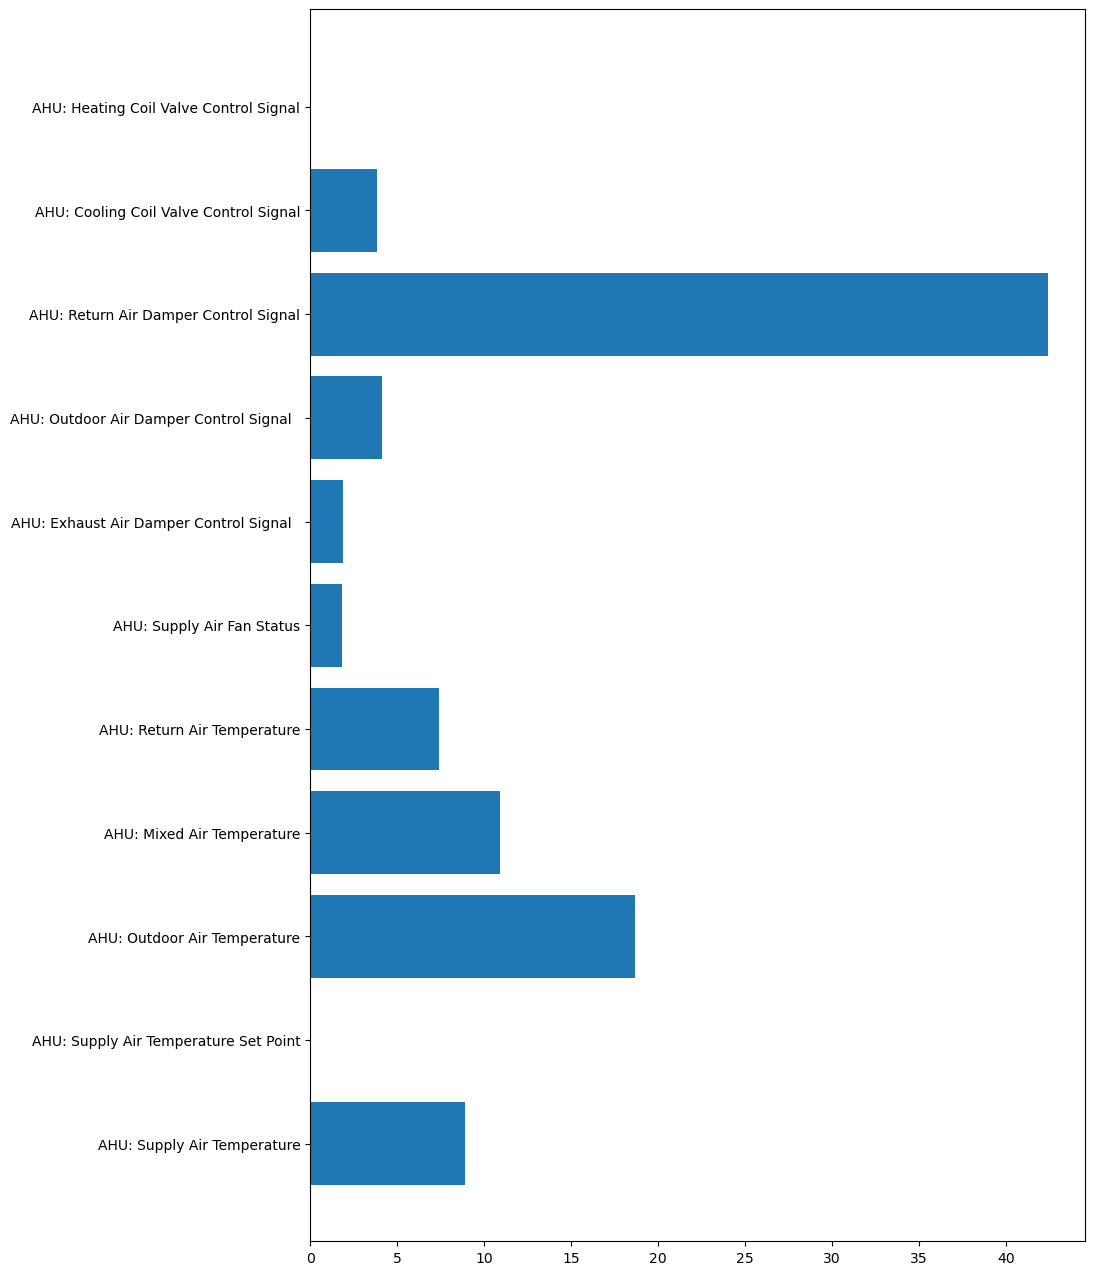

In [71]:
plt.figure(figsize=(10,16))
plt.barh(X_exp.columns, models_exp[4].get_feature_importance())

Surprisingly heating coil valve signal has no importance in detecting faults connected to it. Probably the behavior of the defective element itself does not provide information about its failure. They are probably provided by the anomalous behavior of the remaining elements. For example, the cold valve signal has more weight, because perhaps due to heating valve leakage, it must work more intensively.

# Simulated dataset

## Data exploration and feature engineering

In [72]:
raw_data_sim = pd.read_csv('MZVAV-2-2.csv')

In [73]:
raw_data_sim.sample(5)

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Exhaust Air Damper Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
36317,5/15/2009 5:17,59.53,55,47.32,47.32,59.04,0,0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.4,0.01,0,0
7923,9/2/2007 12:03,59.98,55,80.43,74.90,72.01,1,1,1.00,1.00,0.40,0.40,0.60,0.00,0.00,1.4,3.70,1,1
1194,8/28/2007 19:54,85.77,55,84.27,79.80,79.76,1,0,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.4,1.08,0,1
16918,5/8/2008 17:58,55.00,55,66.26,66.38,72.85,1,1,1.00,1.00,1.00,1.00,0.00,0.47,0.00,1.4,0.02,1,1
30662,2/11/2009 7:02,64.77,65,4.12,46.12,70.02,1,1,0.72,0.58,0.47,0.47,0.53,0.00,0.24,1.4,1.53,1,0


In [74]:
raw_data_sim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37440 entries, 0 to 37439
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Datetime                                        37440 non-null  object 
 1   AHU: Supply Air Temperature                     37440 non-null  float64
 2   AHU: Supply Air Temperature Set Point           37440 non-null  int64  
 3   AHU: Outdoor Air Temperature                    37440 non-null  float64
 4   AHU: Mixed Air Temperature                      37440 non-null  float64
 5   AHU: Return Air Temperature                     37440 non-null  float64
 6   AHU: Supply Air Fan Status                      37440 non-null  int64  
 7   AHU: Return Air Fan Status                      37440 non-null  int64  
 8   AHU: Supply Air Fan Speed Control Signal        37440 non-null  float64
 9   AHU: Return Air Fan Speed Control Signa

Seems that dataset doesn't need cleaning besides changing "Datetime" column datatype to datetime.

In [75]:
raw_data_sim['Datetime'] = pd.to_datetime(raw_data_sim['Datetime'])

In [76]:
raw_data_sim.describe()

,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Exhaust Air Damper Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
count,37440.000000,37440.000000,37440.000000,37440.000000,37440.000000,37440.000000,37440.000000,37440.000000,37440.000000,37440.000000,37440.000000,37440.000000,37440.000000,37440.000000,3.744000e+04,37440.000000,37440.000000,37440.000000
mean,63.237180,55.662126,64.445303,66.916624,68.218243,0.653846,0.500000,0.568830,0.362148,0.286949,0.286949,0.713051,0.203983,0.050786,1.400000e+00,1.343421,0.500000,0.500000
std,11.940915,2.486567,18.987496,14.653489,7.483220,0.475749,0.500007,0.430636,0.387902,0.340170,0.340170,0.340170,0.286489,0.206367,9.201651e-13,1.409967,0.500007,0.500007
min,23.850000,55.000000,1.540000,1.540000,50.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000e+00,-0.490000,0.000000,0.000000
25%,54.980000,55.000000,60.677500,63.360000,60.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,1.400000e+00,0.010000,0.000000,0.000000
50%,60.805000,55.000000,68.470000,71.300000,71.180000,1.000000,0.500000,0.710000,0.240000,0.400000,0.400000,0.600000,0.000000,0.000000,1.400000e+00,1.350000,0.500000,0.500000
75%,71.850000,55.000000,75.582500,74.270000,72.110000,1.000000,1.000000,1.000000,0.580000,0.400000,0.400000,1.000000,0.470000,0.000000,1.400000e+00,1.780000,1.000000,1.000000
max,107.940000,65.000000,91.850000,90.300000,90.870000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.400000e+00,5.010000,1.000000,1.000000


In [77]:
# Making copy of dataset for further data transformation
data_sim = raw_data_sim.copy()

AHU: Supply Air Duct Static Pressure Set Point column has constant values so it will be removed.

In [78]:
data_sim.drop('AHU: Supply Air Duct Static Pressure Set Point', axis=1, inplace=True)

<AxesSubplot:>

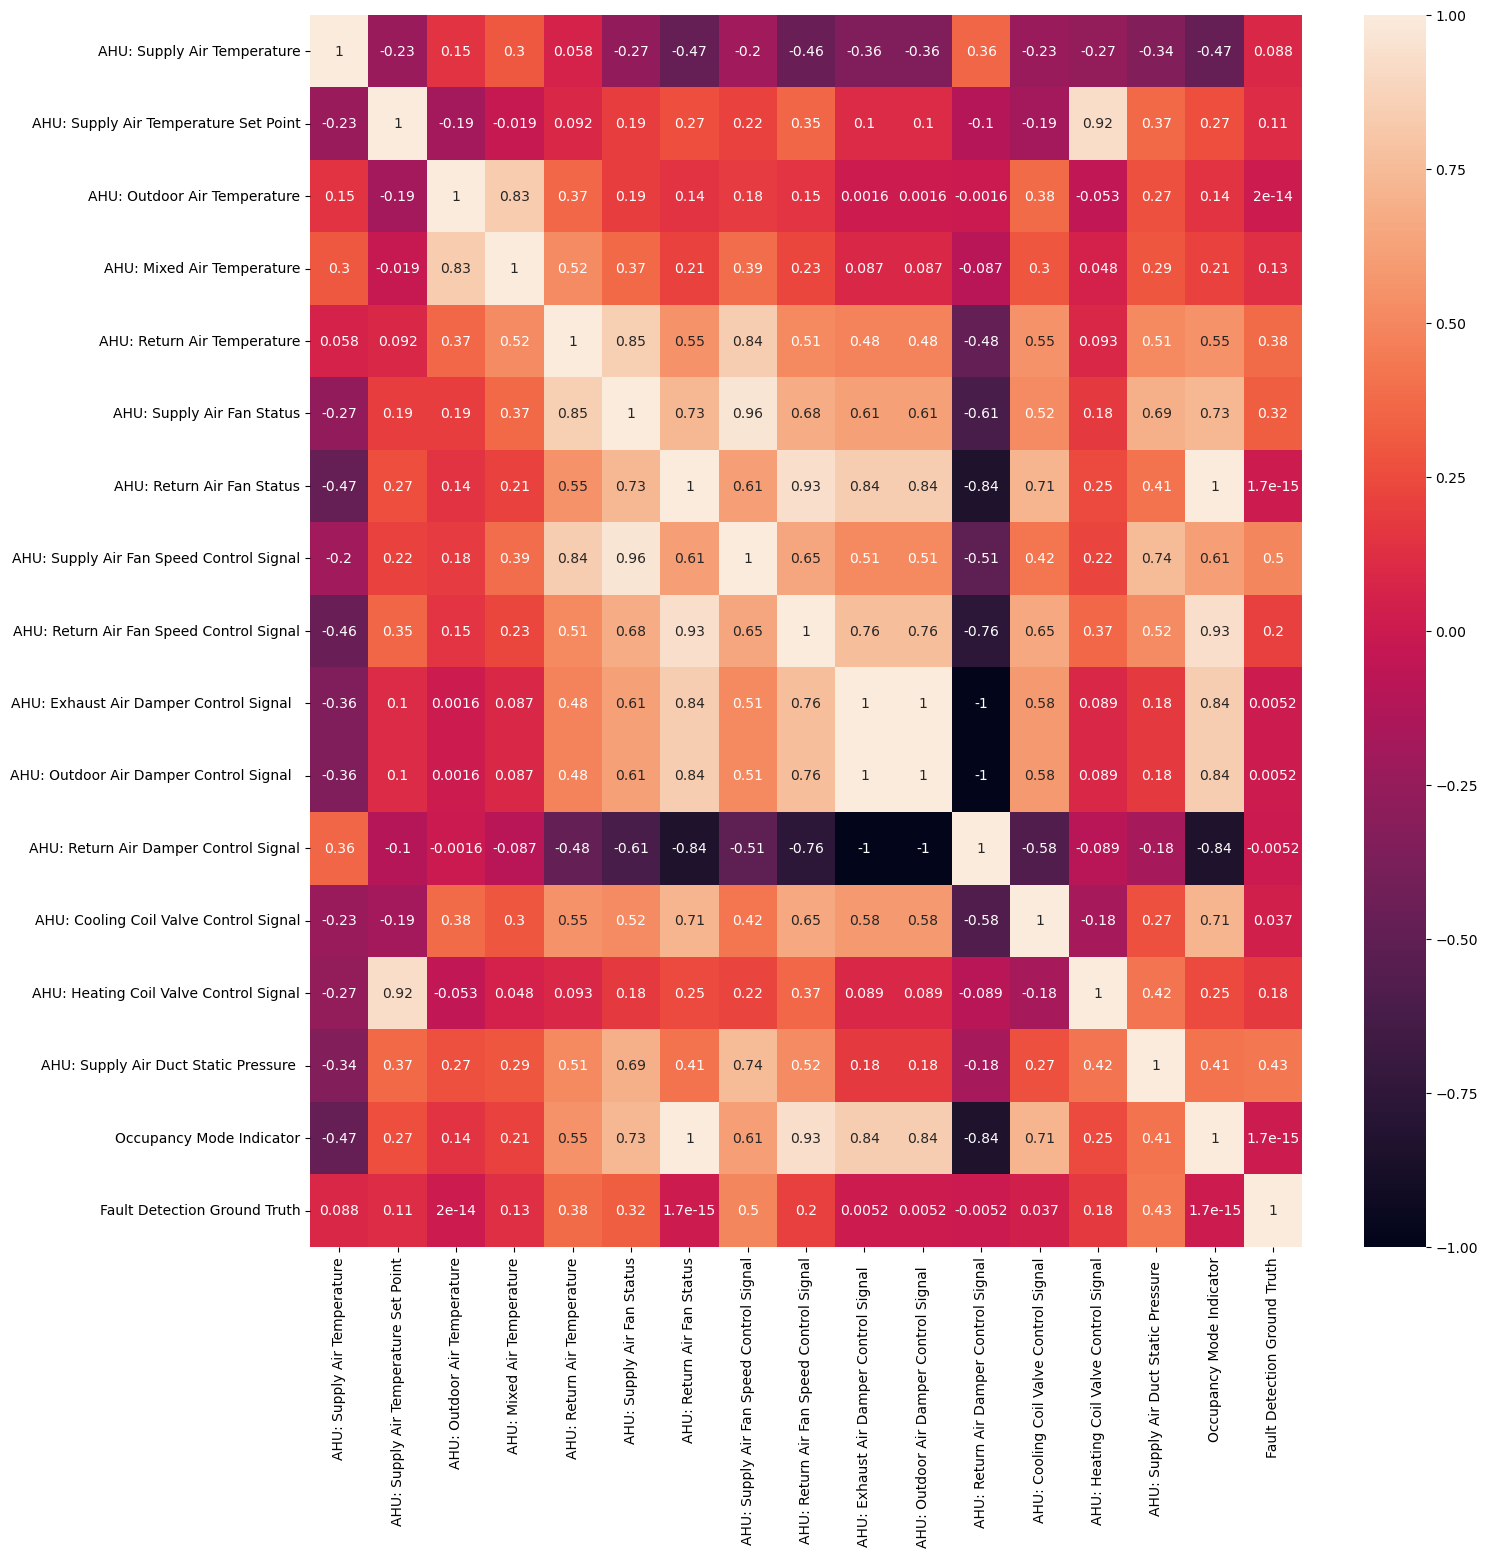

In [79]:
plt.figure(figsize=(16,16))
sns.heatmap(data_sim.corr(), annot=True)

Columns: "AHU: Supply Air Fan Status" and "Occupancy Mode Indicator" are 100% correlated with each other so only the first one will be left. From columns: "AHU: Exhaust Air Damper Control Signal", "AHU: Outdoor Air Damper Control Signal", "AHU: Return Air Damper Control Signal" only the first one will be left also due to 100% correlation with each other.

In [80]:
data_sim.drop(['Occupancy Mode Indicator','AHU: Outdoor Air Damper Control Signal  ','AHU: Return Air Damper Control Signal'], axis=1,inplace=True)

<AxesSubplot:>

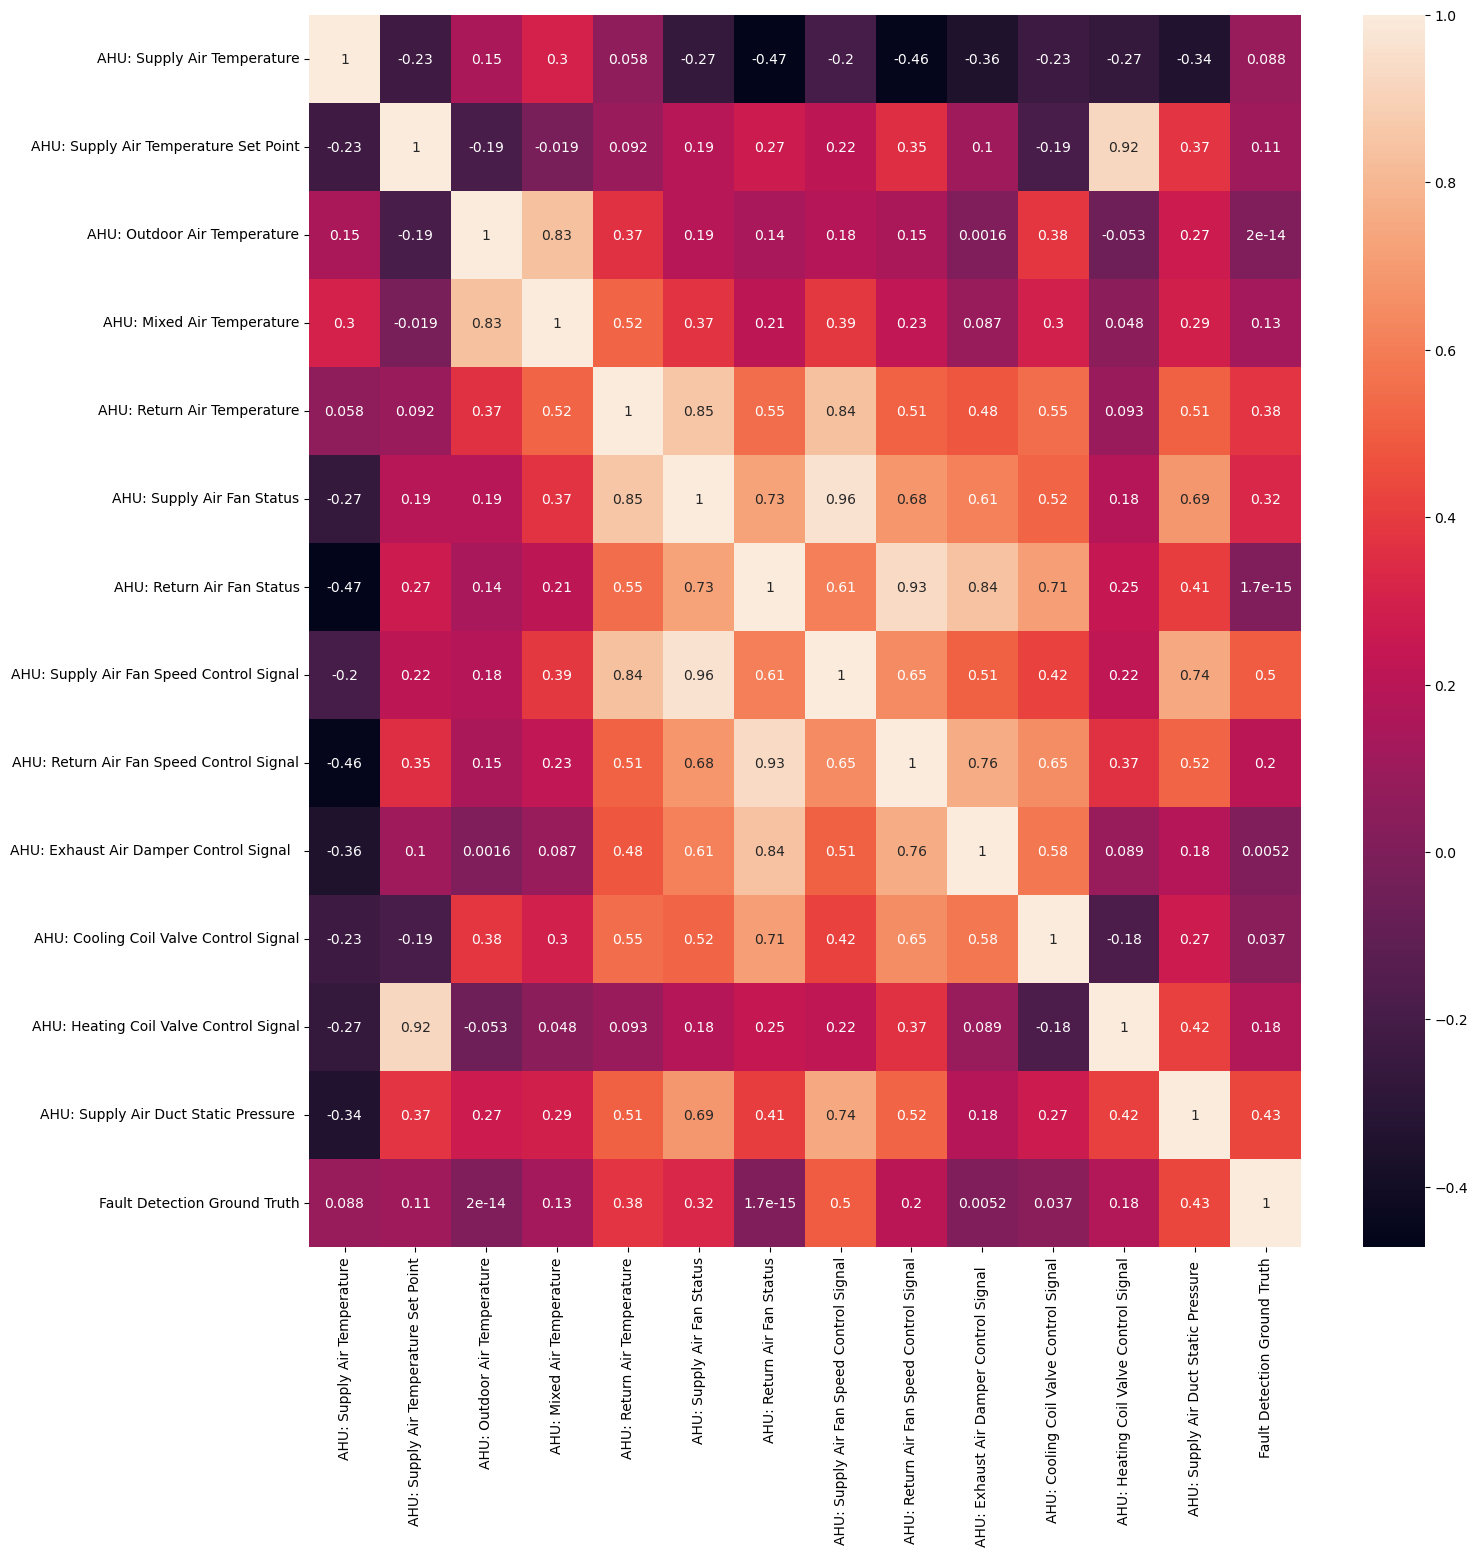

In [81]:
plt.figure(figsize=(16,16))
sns.heatmap(data_sim.corr(), annot=True)

Dataset seems to be ready for model building. We can also see that column "Fault Detection Ground Truth" is correlated with some of the columns, but as we can see in dataset description this columns contains vastly diffrent types of faults. It will be much more valuable to not only know if there is fault or not, but also what kind of fault it is. So three target columns will be prepared.

In [82]:
# Preparing function to convert data format used in dataset description to DateTime format.
def convert_date(date_str):
    return pd.to_datetime(date_str, format='%m/%d/%Y')

In [83]:
# Creating list of dates when faults occured accordin to the description.
OA_fault_dates = [convert_date('2/12/2008'), 
                  convert_date('5/7/2008'), 
                  convert_date('5/8/2008'), 
                  convert_date('9/5/2007'), 
                  convert_date('9/6/2007')]
heat_vlv_fault_dates = [convert_date('8/28/2007'), 
                        convert_date('8/29/2007'), 
                        convert_date('8/30/2007')]
cool_vlv_fault_dates = [convert_date('5/6/2008'), 
                        convert_date('8/31/2007'), 
                        convert_date('5/15/2008'),
                        convert_date('9/1/2007'),
                        convert_date('9/2/2007')]

In [84]:
# Creating and filling faults column with values according to the dates given earlier.
data_sim['OA_fault'] = 0
data_sim['heat_vlv_fault'] = 0
data_sim['cool_vlv_fault'] = 0
for date in OA_fault_dates:
    data_sim.loc[data_sim['Datetime'].dt.date == date.date(), 'OA_fault'] = 1
for date in heat_vlv_fault_dates:
    data_sim.loc[data_sim['Datetime'].dt.date == date.date(), 'heat_vlv_fault'] = 1
for date in cool_vlv_fault_dates:
    data_sim.loc[data_sim['Datetime'].dt.date == date.date(), 'cool_vlv_fault'] = 1

## Models building

### Feature and target data preparation

In [85]:
X_sim = data_sim.drop(['Datetime','Fault Detection Ground Truth','OA_fault','heat_vlv_fault','cool_vlv_fault'], axis=1)

In [86]:
y_oa = data_sim['OA_fault']
y_heat = data_sim['heat_vlv_fault']
y_cool = data_sim['cool_vlv_fault']

### Train test split

In [87]:
X_train_oa, X_test_oa, y_train_oa, y_test_oa = train_test_split(X_sim, y_oa, test_size=0.1, shuffle=True)
X_train_heat, X_test_heat, y_train_heat, y_test_heat = train_test_split(X_sim, y_heat, test_size=0.1, shuffle=True)
X_train_cool, X_test_cool, y_train_cool, y_test_cool = train_test_split(X_sim, y_cool, test_size=0.1, shuffle=True)

### Classification model selection

In [88]:
# Preparing DataFrame to store models evauation parameters.
Acc_oa = pd.DataFrame(index=None, columns=['model','train_accuracy','test_accuracy','train_precision','test_precision',
                                        'train_recall','test_recall','train_f1','test_f1'])
Acc_heat = pd.DataFrame(index=None, columns=['model','train_accuracy','test_accuracy','train_precision','test_precision',
                                        'train_recall','test_recall','train_f1','test_f1'])
Acc_cool = pd.DataFrame(index=None, columns=['model','train_accuracy','test_accuracy','train_precision','test_precision',
                                        'train_recall','test_recall','train_f1','test_f1'])

In [89]:
# Creating list to store models.
models_oa = []
models_heat = []
models_cool = []

In [90]:
# Creating the loop to train and evaluate each model for outside air damper fault.
for mod in classifiers:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train_oa,y_train_oa)
    models_oa.append(model)
    y_pred_train = model.predict(X_train_oa)
    y_pred_test = model.predict(X_test_oa)
    acc_train = accuracy_score(y_train_oa, y_pred_train)
    acc_test = accuracy_score(y_test_oa, y_pred_test)
    prec_train = precision_score(y_train_oa, y_pred_train)
    prec_test = precision_score(y_test_oa, y_pred_test)    
    rec_train = recall_score(y_train_oa, y_pred_train)
    rec_test = recall_score(y_test_oa, y_pred_test) 
    f1_train = f1_score(y_train_oa, y_pred_train)
    f1_test = f1_score(y_test_oa, y_pred_test)
    
    Acc_oa = Acc_oa.append(pd.Series({'model':name,
                                'train_accuracy': acc_train,
                                'test_accuracy': acc_test,
                                'train_precision': prec_train,
                                'test_precision': prec_test,
                                'train_recall': rec_train,
                                'test_recall': rec_test,
                                'train_f1': f1_train,
                                'test_f1': f1_test}),ignore_index=True)

Learning rate set to 0.04626
0:	learn: 0.6224675	total: 14.6ms	remaining: 14.5s
1:	learn: 0.5467859	total: 26.2ms	remaining: 13.1s
2:	learn: 0.4942834	total: 37ms	remaining: 12.3s
3:	learn: 0.4575706	total: 50.9ms	remaining: 12.7s
4:	learn: 0.4140841	total: 62.9ms	remaining: 12.5s
5:	learn: 0.3798974	total: 74.5ms	remaining: 12.3s
6:	learn: 0.3465923	total: 88.2ms	remaining: 12.5s
7:	learn: 0.3174857	total: 101ms	remaining: 12.5s
8:	learn: 0.2934906	total: 116ms	remaining: 12.7s
9:	learn: 0.2747352	total: 127ms	remaining: 12.6s
10:	learn: 0.2631550	total: 139ms	remaining: 12.5s
11:	learn: 0.2515384	total: 152ms	remaining: 12.5s
12:	learn: 0.2348222	total: 165ms	remaining: 12.5s
13:	learn: 0.2280162	total: 179ms	remaining: 12.6s
14:	learn: 0.2209288	total: 190ms	remaining: 12.5s
15:	learn: 0.2111775	total: 201ms	remaining: 12.4s
16:	learn: 0.2043242	total: 220ms	remaining: 12.7s
17:	learn: 0.1989360	total: 237ms	remaining: 12.9s
18:	learn: 0.1915370	total: 252ms	remaining: 13s
19:	learn

167:	learn: 0.0481876	total: 2.3s	remaining: 11.4s
168:	learn: 0.0480820	total: 2.31s	remaining: 11.4s
169:	learn: 0.0478131	total: 2.33s	remaining: 11.4s
170:	learn: 0.0476414	total: 2.34s	remaining: 11.3s
171:	learn: 0.0475461	total: 2.35s	remaining: 11.3s
172:	learn: 0.0474879	total: 2.37s	remaining: 11.3s
173:	learn: 0.0472618	total: 2.38s	remaining: 11.3s
174:	learn: 0.0472171	total: 2.39s	remaining: 11.3s
175:	learn: 0.0471092	total: 2.4s	remaining: 11.3s
176:	learn: 0.0469507	total: 2.42s	remaining: 11.2s
177:	learn: 0.0468302	total: 2.43s	remaining: 11.2s
178:	learn: 0.0467407	total: 2.44s	remaining: 11.2s
179:	learn: 0.0466704	total: 2.46s	remaining: 11.2s
180:	learn: 0.0465607	total: 2.47s	remaining: 11.2s
181:	learn: 0.0464990	total: 2.48s	remaining: 11.1s
182:	learn: 0.0463995	total: 2.49s	remaining: 11.1s
183:	learn: 0.0460657	total: 2.5s	remaining: 11.1s
184:	learn: 0.0459838	total: 2.52s	remaining: 11.1s
185:	learn: 0.0458909	total: 2.53s	remaining: 11.1s
186:	learn: 0.0

339:	learn: 0.0352925	total: 4.59s	remaining: 8.9s
340:	learn: 0.0352378	total: 4.61s	remaining: 8.9s
341:	learn: 0.0352280	total: 4.62s	remaining: 8.88s
342:	learn: 0.0352180	total: 4.63s	remaining: 8.88s
343:	learn: 0.0352158	total: 4.64s	remaining: 8.86s
344:	learn: 0.0351803	total: 4.66s	remaining: 8.84s
345:	learn: 0.0351428	total: 4.67s	remaining: 8.83s
346:	learn: 0.0351338	total: 4.68s	remaining: 8.81s
347:	learn: 0.0350836	total: 4.7s	remaining: 8.8s
348:	learn: 0.0350357	total: 4.71s	remaining: 8.79s
349:	learn: 0.0350026	total: 4.72s	remaining: 8.77s
350:	learn: 0.0349740	total: 4.74s	remaining: 8.76s
351:	learn: 0.0349346	total: 4.75s	remaining: 8.74s
352:	learn: 0.0349225	total: 4.76s	remaining: 8.72s
353:	learn: 0.0349092	total: 4.77s	remaining: 8.71s
354:	learn: 0.0348887	total: 4.78s	remaining: 8.69s
355:	learn: 0.0348509	total: 4.8s	remaining: 8.69s
356:	learn: 0.0348127	total: 4.82s	remaining: 8.68s
357:	learn: 0.0347759	total: 4.83s	remaining: 8.67s
358:	learn: 0.034

513:	learn: 0.0312374	total: 6.88s	remaining: 6.5s
514:	learn: 0.0312269	total: 6.89s	remaining: 6.49s
515:	learn: 0.0312069	total: 6.9s	remaining: 6.48s
516:	learn: 0.0311989	total: 6.92s	remaining: 6.46s
517:	learn: 0.0311800	total: 6.93s	remaining: 6.45s
518:	learn: 0.0311764	total: 6.94s	remaining: 6.43s
519:	learn: 0.0311571	total: 6.95s	remaining: 6.42s
520:	learn: 0.0311377	total: 6.96s	remaining: 6.4s
521:	learn: 0.0311270	total: 6.98s	remaining: 6.39s
522:	learn: 0.0311236	total: 6.99s	remaining: 6.38s
523:	learn: 0.0311115	total: 7s	remaining: 6.36s
524:	learn: 0.0311000	total: 7.01s	remaining: 6.35s
525:	learn: 0.0310952	total: 7.03s	remaining: 6.33s
526:	learn: 0.0310900	total: 7.04s	remaining: 6.32s
527:	learn: 0.0310617	total: 7.05s	remaining: 6.3s
528:	learn: 0.0310310	total: 7.07s	remaining: 6.29s
529:	learn: 0.0310225	total: 7.08s	remaining: 6.28s
530:	learn: 0.0310114	total: 7.09s	remaining: 6.27s
531:	learn: 0.0309858	total: 7.11s	remaining: 6.25s
532:	learn: 0.03098

681:	learn: 0.0299055	total: 8.96s	remaining: 4.18s
682:	learn: 0.0299055	total: 8.98s	remaining: 4.17s
683:	learn: 0.0299055	total: 8.99s	remaining: 4.15s
684:	learn: 0.0299055	total: 9s	remaining: 4.14s
685:	learn: 0.0299055	total: 9.01s	remaining: 4.12s
686:	learn: 0.0299055	total: 9.02s	remaining: 4.11s
687:	learn: 0.0299054	total: 9.03s	remaining: 4.09s
688:	learn: 0.0299054	total: 9.04s	remaining: 4.08s
689:	learn: 0.0299054	total: 9.04s	remaining: 4.06s
690:	learn: 0.0299054	total: 9.06s	remaining: 4.05s
691:	learn: 0.0299054	total: 9.07s	remaining: 4.04s
692:	learn: 0.0299053	total: 9.07s	remaining: 4.02s
693:	learn: 0.0299053	total: 9.09s	remaining: 4.01s
694:	learn: 0.0299053	total: 9.1s	remaining: 3.99s
695:	learn: 0.0299053	total: 9.11s	remaining: 3.98s
696:	learn: 0.0299052	total: 9.12s	remaining: 3.96s
697:	learn: 0.0299052	total: 9.13s	remaining: 3.95s
698:	learn: 0.0299052	total: 9.14s	remaining: 3.93s
699:	learn: 0.0299053	total: 9.14s	remaining: 3.92s
700:	learn: 0.02

853:	learn: 0.0295455	total: 10.8s	remaining: 1.85s
854:	learn: 0.0295455	total: 10.8s	remaining: 1.84s
855:	learn: 0.0295455	total: 10.8s	remaining: 1.82s
856:	learn: 0.0295455	total: 10.9s	remaining: 1.81s
857:	learn: 0.0295455	total: 10.9s	remaining: 1.8s
858:	learn: 0.0295455	total: 10.9s	remaining: 1.78s
859:	learn: 0.0295455	total: 10.9s	remaining: 1.77s
860:	learn: 0.0295455	total: 10.9s	remaining: 1.76s
861:	learn: 0.0295455	total: 10.9s	remaining: 1.75s
862:	learn: 0.0295455	total: 10.9s	remaining: 1.73s
863:	learn: 0.0295455	total: 10.9s	remaining: 1.72s
864:	learn: 0.0295455	total: 10.9s	remaining: 1.71s
865:	learn: 0.0295455	total: 10.9s	remaining: 1.69s
866:	learn: 0.0295455	total: 11s	remaining: 1.68s
867:	learn: 0.0295455	total: 11s	remaining: 1.67s
868:	learn: 0.0295455	total: 11s	remaining: 1.65s
869:	learn: 0.0295455	total: 11s	remaining: 1.64s
870:	learn: 0.0295455	total: 11s	remaining: 1.63s
871:	learn: 0.0295455	total: 11s	remaining: 1.61s
872:	learn: 0.0295455	tot

In [91]:
# Creating the loop to train and evaluate each model for heating valve leakage fault.
for mod in classifiers:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train_heat,y_train_heat)
    models_heat.append(model)
    y_pred_train = model.predict(X_train_heat)
    y_pred_test = model.predict(X_test_heat)
    acc_train = accuracy_score(y_train_heat, y_pred_train)
    acc_test = accuracy_score(y_test_heat, y_pred_test)
    prec_train = precision_score(y_train_heat, y_pred_train)
    prec_test = precision_score(y_test_heat, y_pred_test)    
    rec_train = recall_score(y_train_heat, y_pred_train)
    rec_test = recall_score(y_test_heat, y_pred_test) 
    f1_train = f1_score(y_train_heat, y_pred_train)
    f1_test = f1_score(y_test_heat, y_pred_test)
    
    Acc_heat = Acc_heat.append(pd.Series({'model':name,
                                'train_accuracy': acc_train,
                                'test_accuracy': acc_test,
                                'train_precision': prec_train,
                                'test_precision': prec_test,
                                'train_recall': rec_train,
                                'test_recall': rec_test,
                                'train_f1': f1_train,
                                'test_f1': f1_test}),ignore_index=True)

Learning rate set to 0.04626
0:	learn: 0.5978714	total: 17.6ms	remaining: 17.6s
1:	learn: 0.5299224	total: 33ms	remaining: 16.4s
2:	learn: 0.4691053	total: 45.7ms	remaining: 15.2s
3:	learn: 0.4203366	total: 59.3ms	remaining: 14.8s
4:	learn: 0.3689475	total: 70.6ms	remaining: 14s
5:	learn: 0.3290587	total: 80.6ms	remaining: 13.4s
6:	learn: 0.3000900	total: 94.4ms	remaining: 13.4s
7:	learn: 0.2712307	total: 107ms	remaining: 13.3s
8:	learn: 0.2482436	total: 119ms	remaining: 13.1s
9:	learn: 0.2243006	total: 132ms	remaining: 13.1s
10:	learn: 0.2071487	total: 143ms	remaining: 12.9s
11:	learn: 0.1860325	total: 155ms	remaining: 12.8s
12:	learn: 0.1738395	total: 168ms	remaining: 12.7s
13:	learn: 0.1604320	total: 185ms	remaining: 13.1s
14:	learn: 0.1519767	total: 197ms	remaining: 12.9s
15:	learn: 0.1453297	total: 225ms	remaining: 13.8s
16:	learn: 0.1363249	total: 244ms	remaining: 14.1s
17:	learn: 0.1288935	total: 258ms	remaining: 14.1s
18:	learn: 0.1224846	total: 274ms	remaining: 14.1s
19:	learn

164:	learn: 0.0211028	total: 2.3s	remaining: 11.6s
165:	learn: 0.0209891	total: 2.32s	remaining: 11.7s
166:	learn: 0.0208683	total: 2.33s	remaining: 11.6s
167:	learn: 0.0207635	total: 2.34s	remaining: 11.6s
168:	learn: 0.0206878	total: 2.36s	remaining: 11.6s
169:	learn: 0.0205905	total: 2.37s	remaining: 11.6s
170:	learn: 0.0204897	total: 2.38s	remaining: 11.5s
171:	learn: 0.0203189	total: 2.39s	remaining: 11.5s
172:	learn: 0.0202015	total: 2.41s	remaining: 11.5s
173:	learn: 0.0201328	total: 2.44s	remaining: 11.6s
174:	learn: 0.0200114	total: 2.45s	remaining: 11.6s
175:	learn: 0.0199401	total: 2.46s	remaining: 11.5s
176:	learn: 0.0198786	total: 2.47s	remaining: 11.5s
177:	learn: 0.0197357	total: 2.49s	remaining: 11.5s
178:	learn: 0.0195009	total: 2.5s	remaining: 11.5s
179:	learn: 0.0193372	total: 2.52s	remaining: 11.5s
180:	learn: 0.0192286	total: 2.53s	remaining: 11.5s
181:	learn: 0.0191382	total: 2.54s	remaining: 11.4s
182:	learn: 0.0190945	total: 2.56s	remaining: 11.4s
183:	learn: 0.

327:	learn: 0.0106116	total: 5.08s	remaining: 10.4s
328:	learn: 0.0105688	total: 5.09s	remaining: 10.4s
329:	learn: 0.0105389	total: 5.11s	remaining: 10.4s
330:	learn: 0.0105121	total: 5.12s	remaining: 10.3s
331:	learn: 0.0104798	total: 5.13s	remaining: 10.3s
332:	learn: 0.0104641	total: 5.14s	remaining: 10.3s
333:	learn: 0.0104406	total: 5.15s	remaining: 10.3s
334:	learn: 0.0104289	total: 5.16s	remaining: 10.3s
335:	learn: 0.0104186	total: 5.19s	remaining: 10.2s
336:	learn: 0.0103809	total: 5.2s	remaining: 10.2s
337:	learn: 0.0103493	total: 5.22s	remaining: 10.2s
338:	learn: 0.0103191	total: 5.23s	remaining: 10.2s
339:	learn: 0.0102927	total: 5.25s	remaining: 10.2s
340:	learn: 0.0102640	total: 5.27s	remaining: 10.2s
341:	learn: 0.0102391	total: 5.29s	remaining: 10.2s
342:	learn: 0.0101867	total: 5.32s	remaining: 10.2s
343:	learn: 0.0101372	total: 5.33s	remaining: 10.2s
344:	learn: 0.0100952	total: 5.34s	remaining: 10.1s
345:	learn: 0.0100845	total: 5.36s	remaining: 10.1s
346:	learn: 0

500:	learn: 0.0068523	total: 8.67s	remaining: 8.63s
501:	learn: 0.0068394	total: 8.68s	remaining: 8.61s
502:	learn: 0.0068155	total: 8.69s	remaining: 8.59s
503:	learn: 0.0067952	total: 8.71s	remaining: 8.57s
504:	learn: 0.0067697	total: 8.72s	remaining: 8.55s
505:	learn: 0.0067201	total: 8.73s	remaining: 8.52s
506:	learn: 0.0067153	total: 8.74s	remaining: 8.5s
507:	learn: 0.0067049	total: 8.75s	remaining: 8.48s
508:	learn: 0.0067016	total: 8.77s	remaining: 8.46s
509:	learn: 0.0066899	total: 8.78s	remaining: 8.43s
510:	learn: 0.0066789	total: 8.79s	remaining: 8.41s
511:	learn: 0.0066624	total: 8.8s	remaining: 8.39s
512:	learn: 0.0066532	total: 8.81s	remaining: 8.37s
513:	learn: 0.0066391	total: 8.83s	remaining: 8.35s
514:	learn: 0.0066343	total: 8.84s	remaining: 8.33s
515:	learn: 0.0066222	total: 8.85s	remaining: 8.3s
516:	learn: 0.0066119	total: 8.87s	remaining: 8.28s
517:	learn: 0.0066004	total: 8.88s	remaining: 8.26s
518:	learn: 0.0065764	total: 8.9s	remaining: 8.24s
519:	learn: 0.00

662:	learn: 0.0051070	total: 10.8s	remaining: 5.5s
663:	learn: 0.0050986	total: 10.8s	remaining: 5.48s
664:	learn: 0.0050968	total: 10.8s	remaining: 5.46s
665:	learn: 0.0050906	total: 10.9s	remaining: 5.44s
666:	learn: 0.0050824	total: 10.9s	remaining: 5.42s
667:	learn: 0.0050767	total: 10.9s	remaining: 5.41s
668:	learn: 0.0050674	total: 10.9s	remaining: 5.39s
669:	learn: 0.0050487	total: 10.9s	remaining: 5.37s
670:	learn: 0.0050406	total: 10.9s	remaining: 5.35s
671:	learn: 0.0050231	total: 10.9s	remaining: 5.33s
672:	learn: 0.0050184	total: 10.9s	remaining: 5.31s
673:	learn: 0.0050142	total: 10.9s	remaining: 5.29s
674:	learn: 0.0050048	total: 11s	remaining: 5.27s
675:	learn: 0.0049936	total: 11s	remaining: 5.25s
676:	learn: 0.0049901	total: 11s	remaining: 5.23s
677:	learn: 0.0049842	total: 11s	remaining: 5.21s
678:	learn: 0.0049597	total: 11s	remaining: 5.2s
679:	learn: 0.0049564	total: 11s	remaining: 5.18s
680:	learn: 0.0049487	total: 11s	remaining: 5.16s
681:	learn: 0.0049430	total:

828:	learn: 0.0040294	total: 12.7s	remaining: 2.61s
829:	learn: 0.0040243	total: 12.7s	remaining: 2.6s
830:	learn: 0.0040181	total: 12.7s	remaining: 2.58s
831:	learn: 0.0040094	total: 12.7s	remaining: 2.57s
832:	learn: 0.0040047	total: 12.7s	remaining: 2.55s
833:	learn: 0.0040010	total: 12.7s	remaining: 2.54s
834:	learn: 0.0039990	total: 12.8s	remaining: 2.52s
835:	learn: 0.0039965	total: 12.8s	remaining: 2.51s
836:	learn: 0.0039923	total: 12.8s	remaining: 2.5s
837:	learn: 0.0039898	total: 12.9s	remaining: 2.49s
838:	learn: 0.0039859	total: 12.9s	remaining: 2.48s
839:	learn: 0.0039828	total: 12.9s	remaining: 2.47s
840:	learn: 0.0039792	total: 13s	remaining: 2.45s
841:	learn: 0.0039725	total: 13s	remaining: 2.44s
842:	learn: 0.0039656	total: 13.1s	remaining: 2.43s
843:	learn: 0.0039612	total: 13.1s	remaining: 2.43s
844:	learn: 0.0039561	total: 13.2s	remaining: 2.41s
845:	learn: 0.0039508	total: 13.2s	remaining: 2.41s
846:	learn: 0.0039453	total: 13.3s	remaining: 2.4s
847:	learn: 0.00394

993:	learn: 0.0033237	total: 15.4s	remaining: 93.2ms
994:	learn: 0.0033198	total: 15.5s	remaining: 77.7ms
995:	learn: 0.0033125	total: 15.5s	remaining: 62.2ms
996:	learn: 0.0033089	total: 15.5s	remaining: 46.6ms
997:	learn: 0.0033043	total: 15.5s	remaining: 31.1ms
998:	learn: 0.0033030	total: 15.5s	remaining: 15.5ms
999:	learn: 0.0032936	total: 15.5s	remaining: 0us


In [92]:
# Creating the loop to train and evaluate each model for cooling valve leakage fault.
for mod in classifiers:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train_cool,y_train_cool)
    models_cool.append(model)
    y_pred_train = model.predict(X_train_cool)
    y_pred_test = model.predict(X_test_cool)
    acc_train = accuracy_score(y_train_cool, y_pred_train)
    acc_test = accuracy_score(y_test_cool, y_pred_test)
    prec_train = precision_score(y_train_cool, y_pred_train)
    prec_test = precision_score(y_test_cool, y_pred_test)    
    rec_train = recall_score(y_train_cool, y_pred_train)
    rec_test = recall_score(y_test_cool, y_pred_test) 
    f1_train = f1_score(y_train_cool, y_pred_train)
    f1_test = f1_score(y_test_cool, y_pred_test)
    
    Acc_cool = Acc_cool.append(pd.Series({'model':name,
                                'train_accuracy': acc_train,
                                'test_accuracy': acc_test,
                                'train_precision': prec_train,
                                'test_precision': prec_test,
                                'train_recall': rec_train,
                                'test_recall': rec_test,
                                'train_f1': f1_train,
                                'test_f1': f1_test}),ignore_index=True)

Learning rate set to 0.04626
0:	learn: 0.5965298	total: 27.6ms	remaining: 27.5s
1:	learn: 0.5211574	total: 42.8ms	remaining: 21.3s
2:	learn: 0.4604444	total: 59.7ms	remaining: 19.8s
3:	learn: 0.4120395	total: 76.4ms	remaining: 19s
4:	learn: 0.3746472	total: 94.2ms	remaining: 18.7s
5:	learn: 0.3317969	total: 109ms	remaining: 18.1s
6:	learn: 0.2986984	total: 126ms	remaining: 17.8s
7:	learn: 0.2729095	total: 142ms	remaining: 17.6s
8:	learn: 0.2496276	total: 156ms	remaining: 17.2s
9:	learn: 0.2312150	total: 167ms	remaining: 16.5s
10:	learn: 0.2122480	total: 178ms	remaining: 16s
11:	learn: 0.1983210	total: 192ms	remaining: 15.8s
12:	learn: 0.1855531	total: 203ms	remaining: 15.4s
13:	learn: 0.1747983	total: 222ms	remaining: 15.6s
14:	learn: 0.1635858	total: 242ms	remaining: 15.9s
15:	learn: 0.1549663	total: 255ms	remaining: 15.7s
16:	learn: 0.1418596	total: 266ms	remaining: 15.4s
17:	learn: 0.1353874	total: 278ms	remaining: 15.1s
18:	learn: 0.1282879	total: 292ms	remaining: 15.1s
19:	learn: 

174:	learn: 0.0301852	total: 2.28s	remaining: 10.8s
175:	learn: 0.0300989	total: 2.3s	remaining: 10.8s
176:	learn: 0.0300283	total: 2.31s	remaining: 10.7s
177:	learn: 0.0299817	total: 2.32s	remaining: 10.7s
178:	learn: 0.0299485	total: 2.33s	remaining: 10.7s
179:	learn: 0.0299059	total: 2.35s	remaining: 10.7s
180:	learn: 0.0298702	total: 2.36s	remaining: 10.7s
181:	learn: 0.0298294	total: 2.37s	remaining: 10.7s
182:	learn: 0.0297686	total: 2.38s	remaining: 10.6s
183:	learn: 0.0296496	total: 2.39s	remaining: 10.6s
184:	learn: 0.0296358	total: 2.41s	remaining: 10.6s
185:	learn: 0.0294991	total: 2.42s	remaining: 10.6s
186:	learn: 0.0294202	total: 2.43s	remaining: 10.6s
187:	learn: 0.0294022	total: 2.44s	remaining: 10.5s
188:	learn: 0.0293639	total: 2.45s	remaining: 10.5s
189:	learn: 0.0293107	total: 2.46s	remaining: 10.5s
190:	learn: 0.0292124	total: 2.48s	remaining: 10.5s
191:	learn: 0.0291496	total: 2.5s	remaining: 10.5s
192:	learn: 0.0291389	total: 2.51s	remaining: 10.5s
193:	learn: 0.

339:	learn: 0.0229814	total: 4.82s	remaining: 9.35s
340:	learn: 0.0229590	total: 4.84s	remaining: 9.35s
341:	learn: 0.0229314	total: 4.85s	remaining: 9.33s
342:	learn: 0.0228885	total: 4.86s	remaining: 9.31s
343:	learn: 0.0228612	total: 4.88s	remaining: 9.3s
344:	learn: 0.0228484	total: 4.89s	remaining: 9.28s
345:	learn: 0.0228170	total: 4.9s	remaining: 9.26s
346:	learn: 0.0228130	total: 4.91s	remaining: 9.24s
347:	learn: 0.0227989	total: 4.92s	remaining: 9.22s
348:	learn: 0.0227719	total: 4.94s	remaining: 9.21s
349:	learn: 0.0227585	total: 4.95s	remaining: 9.19s
350:	learn: 0.0227341	total: 4.96s	remaining: 9.17s
351:	learn: 0.0227178	total: 4.97s	remaining: 9.16s
352:	learn: 0.0227095	total: 4.99s	remaining: 9.14s
353:	learn: 0.0226788	total: 5s	remaining: 9.12s
354:	learn: 0.0226599	total: 5.01s	remaining: 9.1s
355:	learn: 0.0226324	total: 5.02s	remaining: 9.08s
356:	learn: 0.0226050	total: 5.03s	remaining: 9.07s
357:	learn: 0.0225899	total: 5.05s	remaining: 9.05s
358:	learn: 0.0225

504:	learn: 0.0207650	total: 6.74s	remaining: 6.6s
505:	learn: 0.0207650	total: 6.75s	remaining: 6.59s
506:	learn: 0.0207650	total: 6.76s	remaining: 6.57s
507:	learn: 0.0207650	total: 6.77s	remaining: 6.56s
508:	learn: 0.0207650	total: 6.78s	remaining: 6.54s
509:	learn: 0.0207650	total: 6.79s	remaining: 6.52s
510:	learn: 0.0207650	total: 6.8s	remaining: 6.5s
511:	learn: 0.0207650	total: 6.8s	remaining: 6.49s
512:	learn: 0.0207650	total: 6.81s	remaining: 6.47s
513:	learn: 0.0207650	total: 6.82s	remaining: 6.45s
514:	learn: 0.0207650	total: 6.83s	remaining: 6.43s
515:	learn: 0.0207650	total: 6.84s	remaining: 6.42s
516:	learn: 0.0207650	total: 6.85s	remaining: 6.4s
517:	learn: 0.0207650	total: 6.86s	remaining: 6.38s
518:	learn: 0.0207650	total: 6.87s	remaining: 6.36s
519:	learn: 0.0207650	total: 6.87s	remaining: 6.34s
520:	learn: 0.0207650	total: 6.88s	remaining: 6.33s
521:	learn: 0.0207650	total: 6.89s	remaining: 6.31s
522:	learn: 0.0207650	total: 6.9s	remaining: 6.29s
523:	learn: 0.0207

684:	learn: 0.0203384	total: 8.62s	remaining: 3.96s
685:	learn: 0.0203384	total: 8.63s	remaining: 3.95s
686:	learn: 0.0203384	total: 8.64s	remaining: 3.94s
687:	learn: 0.0203384	total: 8.65s	remaining: 3.92s
688:	learn: 0.0203384	total: 8.66s	remaining: 3.91s
689:	learn: 0.0203384	total: 8.67s	remaining: 3.89s
690:	learn: 0.0203384	total: 8.68s	remaining: 3.88s
691:	learn: 0.0203384	total: 8.69s	remaining: 3.87s
692:	learn: 0.0203384	total: 8.7s	remaining: 3.85s
693:	learn: 0.0203384	total: 8.71s	remaining: 3.84s
694:	learn: 0.0203363	total: 8.72s	remaining: 3.83s
695:	learn: 0.0203363	total: 8.73s	remaining: 3.81s
696:	learn: 0.0203363	total: 8.74s	remaining: 3.8s
697:	learn: 0.0203335	total: 8.75s	remaining: 3.79s
698:	learn: 0.0203335	total: 8.76s	remaining: 3.77s
699:	learn: 0.0203335	total: 8.77s	remaining: 3.76s
700:	learn: 0.0203335	total: 8.78s	remaining: 3.75s
701:	learn: 0.0203335	total: 8.79s	remaining: 3.73s
702:	learn: 0.0203335	total: 8.8s	remaining: 3.72s
703:	learn: 0.0

847:	learn: 0.0203071	total: 10.3s	remaining: 1.84s
848:	learn: 0.0203071	total: 10.3s	remaining: 1.83s
849:	learn: 0.0203071	total: 10.3s	remaining: 1.81s
850:	learn: 0.0203071	total: 10.3s	remaining: 1.8s
851:	learn: 0.0203071	total: 10.3s	remaining: 1.79s
852:	learn: 0.0203071	total: 10.3s	remaining: 1.78s
853:	learn: 0.0203071	total: 10.3s	remaining: 1.76s
854:	learn: 0.0203071	total: 10.3s	remaining: 1.75s
855:	learn: 0.0203071	total: 10.3s	remaining: 1.74s
856:	learn: 0.0203071	total: 10.3s	remaining: 1.73s
857:	learn: 0.0203071	total: 10.4s	remaining: 1.71s
858:	learn: 0.0203071	total: 10.4s	remaining: 1.7s
859:	learn: 0.0203071	total: 10.4s	remaining: 1.69s
860:	learn: 0.0203071	total: 10.4s	remaining: 1.68s
861:	learn: 0.0203071	total: 10.4s	remaining: 1.66s
862:	learn: 0.0203071	total: 10.4s	remaining: 1.65s
863:	learn: 0.0203071	total: 10.4s	remaining: 1.64s
864:	learn: 0.0203071	total: 10.4s	remaining: 1.63s
865:	learn: 0.0203071	total: 10.4s	remaining: 1.61s
866:	learn: 0.

## Models evaluation

In [93]:
print(Acc_oa)

                        model  train_accuracy  test_accuracy  train_precision  \
0        KNeighborsClassifier        0.980888       0.959669         0.952432   
1               MLPClassifier        0.954683       0.955128         0.903372   
2          AdaBoostClassifier        0.956879       0.953793         0.924512   
3  GradientBoostingClassifier        0.972697       0.973024         0.982208   
4          CatBoostClassifier        0.981719       0.970887         0.969832   
5               XGBClassifier        0.982580       0.963942         0.969822   
6           BaggingClassifier        0.982728       0.961004         0.958069   
7      RandomForestClassifier        0.982847       0.961271         0.957388   
8      DecisionTreeClassifier        0.982847       0.959402         1.000000   
9          LogisticRegression        0.847786       0.844818         0.666505   

   test_precision  train_recall  test_recall  train_f1   test_f1  
0        0.891117      0.948332     0.892

In [94]:
print(Acc_heat)

                        model  train_accuracy  test_accuracy  train_precision  \
0        KNeighborsClassifier        0.987684       0.978632         0.957290   
1               MLPClassifier        0.959313       0.957799         0.869233   
2          AdaBoostClassifier        0.969848       0.969017         0.962282   
3  GradientBoostingClassifier        0.986556       0.983707         0.970645   
4          CatBoostClassifier        0.999763       0.995459         0.999742   
5               XGBClassifier        1.000000       0.994391         1.000000   
6           BaggingClassifier        0.999763       0.994925         0.999742   
7      RandomForestClassifier        1.000000       0.995459         1.000000   
8      DecisionTreeClassifier        1.000000       0.993323         1.000000   
9          LogisticRegression        0.891115       0.887553         0.589360   

   test_precision  train_recall  test_recall  train_f1   test_f1  
0        0.912037      0.934861     0.903

In [95]:
print(Acc_cool)

                        model  train_accuracy  test_accuracy  train_precision  \
0        KNeighborsClassifier        0.988960       0.980502         0.976650   
1               MLPClassifier        0.974151       0.975160         0.924528   
2          AdaBoostClassifier        0.974863       0.974893         0.978486   
3  GradientBoostingClassifier        0.983737       0.983173         0.996494   
4          CatBoostClassifier        0.988960       0.985043         0.990862   
5               XGBClassifier        0.989613       0.979167         0.983632   
6           BaggingClassifier        0.989761       0.976763         0.976600   
7      RandomForestClassifier        0.989791       0.978098         0.980625   
8      DecisionTreeClassifier        0.989791       0.977297         1.000000   
9          LogisticRegression        0.891738       0.892094         0.832400   

   test_precision  train_recall  test_recall  train_f1   test_f1  
0        0.946252      0.965825     0.950

As we can see most models performed really well in all tasks with means that dependencies in data were really easy to grasp by models and it would be really easy to train such models for the use ine building management systems. Important thing to consider is that this models are trained on simulated data so they are some kind of models of a model. So it is important to examine if model trained on experaimental and simulated data are similar if htey track similar dependencies and are useful for real data and systems.

Perhaps in models predicting fault with damper and cooling valve we can try to tune model a bit by balancing class weight to reach better preformance. We will use CatBoostClassifier functionality to do this.

## Class balancing

In [96]:
model_oa = CatBoostClassifier(auto_class_weights='Balanced')

In [97]:
model_oa.fit(X_train_oa, y_train_oa)

Learning rate set to 0.04626
0:	learn: 0.6175494	total: 18ms	remaining: 18s
1:	learn: 0.5689728	total: 28.1ms	remaining: 14s
2:	learn: 0.5301882	total: 46.5ms	remaining: 15.4s
3:	learn: 0.4918001	total: 76ms	remaining: 18.9s
4:	learn: 0.4666374	total: 121ms	remaining: 24s
5:	learn: 0.4398067	total: 146ms	remaining: 24.2s
6:	learn: 0.4225716	total: 162ms	remaining: 23s
7:	learn: 0.3911884	total: 181ms	remaining: 22.4s
8:	learn: 0.3724144	total: 193ms	remaining: 21.3s
9:	learn: 0.3562421	total: 219ms	remaining: 21.7s
10:	learn: 0.3422985	total: 244ms	remaining: 22s
11:	learn: 0.3291571	total: 271ms	remaining: 22.3s
12:	learn: 0.3171734	total: 284ms	remaining: 21.6s
13:	learn: 0.2963420	total: 301ms	remaining: 21.2s
14:	learn: 0.2896393	total: 316ms	remaining: 20.7s
15:	learn: 0.2811615	total: 337ms	remaining: 20.7s
16:	learn: 0.2661465	total: 351ms	remaining: 20.3s
17:	learn: 0.2557887	total: 367ms	remaining: 20s
18:	learn: 0.2496234	total: 380ms	remaining: 19.6s
19:	learn: 0.2426695	tot

163:	learn: 0.0597004	total: 3.81s	remaining: 19.4s
164:	learn: 0.0595925	total: 3.83s	remaining: 19.4s
165:	learn: 0.0592026	total: 3.85s	remaining: 19.3s
166:	learn: 0.0587802	total: 3.86s	remaining: 19.3s
167:	learn: 0.0584738	total: 3.88s	remaining: 19.2s
168:	learn: 0.0583226	total: 3.89s	remaining: 19.1s
169:	learn: 0.0581616	total: 3.91s	remaining: 19.1s
170:	learn: 0.0579264	total: 3.92s	remaining: 19s
171:	learn: 0.0578375	total: 3.94s	remaining: 18.9s
172:	learn: 0.0578002	total: 3.95s	remaining: 18.9s
173:	learn: 0.0575822	total: 3.96s	remaining: 18.8s
174:	learn: 0.0573413	total: 3.98s	remaining: 18.8s
175:	learn: 0.0572101	total: 3.99s	remaining: 18.7s
176:	learn: 0.0567956	total: 4.02s	remaining: 18.7s
177:	learn: 0.0566429	total: 4.05s	remaining: 18.7s
178:	learn: 0.0565457	total: 4.07s	remaining: 18.7s
179:	learn: 0.0564078	total: 4.09s	remaining: 18.6s
180:	learn: 0.0562225	total: 4.11s	remaining: 18.6s
181:	learn: 0.0559661	total: 4.13s	remaining: 18.5s
182:	learn: 0.

324:	learn: 0.0409104	total: 6.4s	remaining: 13.3s
325:	learn: 0.0408658	total: 6.42s	remaining: 13.3s
326:	learn: 0.0408315	total: 6.43s	remaining: 13.2s
327:	learn: 0.0407351	total: 6.45s	remaining: 13.2s
328:	learn: 0.0406696	total: 6.46s	remaining: 13.2s
329:	learn: 0.0406154	total: 6.48s	remaining: 13.1s
330:	learn: 0.0405286	total: 6.49s	remaining: 13.1s
331:	learn: 0.0404905	total: 6.51s	remaining: 13.1s
332:	learn: 0.0403893	total: 6.52s	remaining: 13.1s
333:	learn: 0.0403529	total: 6.54s	remaining: 13s
334:	learn: 0.0402890	total: 6.55s	remaining: 13s
335:	learn: 0.0402379	total: 6.56s	remaining: 13s
336:	learn: 0.0402131	total: 6.58s	remaining: 12.9s
337:	learn: 0.0401828	total: 6.6s	remaining: 12.9s
338:	learn: 0.0401246	total: 6.62s	remaining: 12.9s
339:	learn: 0.0400837	total: 6.63s	remaining: 12.9s
340:	learn: 0.0400354	total: 6.65s	remaining: 12.8s
341:	learn: 0.0400114	total: 6.66s	remaining: 12.8s
342:	learn: 0.0399802	total: 6.68s	remaining: 12.8s
343:	learn: 0.039936

486:	learn: 0.0362417	total: 8.75s	remaining: 9.22s
487:	learn: 0.0362273	total: 8.77s	remaining: 9.2s
488:	learn: 0.0362128	total: 8.78s	remaining: 9.18s
489:	learn: 0.0362059	total: 8.79s	remaining: 9.15s
490:	learn: 0.0361758	total: 8.81s	remaining: 9.13s
491:	learn: 0.0361484	total: 8.82s	remaining: 9.11s
492:	learn: 0.0361355	total: 8.83s	remaining: 9.08s
493:	learn: 0.0361230	total: 8.85s	remaining: 9.06s
494:	learn: 0.0360932	total: 8.86s	remaining: 9.04s
495:	learn: 0.0360608	total: 8.88s	remaining: 9.02s
496:	learn: 0.0360385	total: 8.89s	remaining: 9s
497:	learn: 0.0360259	total: 8.91s	remaining: 8.98s
498:	learn: 0.0360132	total: 8.93s	remaining: 8.96s
499:	learn: 0.0360017	total: 8.94s	remaining: 8.94s
500:	learn: 0.0360017	total: 8.95s	remaining: 8.92s
501:	learn: 0.0359909	total: 8.97s	remaining: 8.9s
502:	learn: 0.0359533	total: 8.99s	remaining: 8.88s
503:	learn: 0.0359243	total: 9.01s	remaining: 8.86s
504:	learn: 0.0359148	total: 9.02s	remaining: 8.84s
505:	learn: 0.035

650:	learn: 0.0342660	total: 11.1s	remaining: 5.93s
651:	learn: 0.0342660	total: 11.1s	remaining: 5.91s
652:	learn: 0.0342660	total: 11.1s	remaining: 5.89s
653:	learn: 0.0342660	total: 11.1s	remaining: 5.87s
654:	learn: 0.0342530	total: 11.1s	remaining: 5.85s
655:	learn: 0.0342530	total: 11.1s	remaining: 5.83s
656:	learn: 0.0342460	total: 11.1s	remaining: 5.81s
657:	learn: 0.0342125	total: 11.1s	remaining: 5.79s
658:	learn: 0.0342087	total: 11.2s	remaining: 5.77s
659:	learn: 0.0342052	total: 11.2s	remaining: 5.75s
660:	learn: 0.0341997	total: 11.2s	remaining: 5.73s
661:	learn: 0.0341955	total: 11.2s	remaining: 5.72s
662:	learn: 0.0341831	total: 11.2s	remaining: 5.7s
663:	learn: 0.0341698	total: 11.2s	remaining: 5.68s
664:	learn: 0.0341637	total: 11.2s	remaining: 5.66s
665:	learn: 0.0341523	total: 11.2s	remaining: 5.64s
666:	learn: 0.0341443	total: 11.3s	remaining: 5.62s
667:	learn: 0.0341391	total: 11.3s	remaining: 5.6s
668:	learn: 0.0341369	total: 11.3s	remaining: 5.58s
669:	learn: 0.

828:	learn: 0.0337461	total: 13.2s	remaining: 2.71s
829:	learn: 0.0337461	total: 13.2s	remaining: 2.7s
830:	learn: 0.0337461	total: 13.2s	remaining: 2.68s
831:	learn: 0.0337461	total: 13.2s	remaining: 2.66s
832:	learn: 0.0337461	total: 13.2s	remaining: 2.65s
833:	learn: 0.0337461	total: 13.2s	remaining: 2.63s
834:	learn: 0.0337461	total: 13.2s	remaining: 2.61s
835:	learn: 0.0337461	total: 13.2s	remaining: 2.6s
836:	learn: 0.0337461	total: 13.2s	remaining: 2.58s
837:	learn: 0.0337461	total: 13.3s	remaining: 2.56s
838:	learn: 0.0337461	total: 13.3s	remaining: 2.55s
839:	learn: 0.0337461	total: 13.3s	remaining: 2.53s
840:	learn: 0.0337461	total: 13.3s	remaining: 2.51s
841:	learn: 0.0337461	total: 13.3s	remaining: 2.49s
842:	learn: 0.0337461	total: 13.3s	remaining: 2.48s
843:	learn: 0.0337461	total: 13.3s	remaining: 2.46s
844:	learn: 0.0337461	total: 13.3s	remaining: 2.44s
845:	learn: 0.0337461	total: 13.3s	remaining: 2.43s
846:	learn: 0.0337461	total: 13.3s	remaining: 2.41s
847:	learn: 0.

993:	learn: 0.0337289	total: 15s	remaining: 90.7ms
994:	learn: 0.0337289	total: 15s	remaining: 75.6ms
995:	learn: 0.0337289	total: 15.1s	remaining: 60.5ms
996:	learn: 0.0337289	total: 15.1s	remaining: 45.3ms
997:	learn: 0.0337289	total: 15.1s	remaining: 30.2ms
998:	learn: 0.0337289	total: 15.1s	remaining: 15.1ms
999:	learn: 0.0337288	total: 15.1s	remaining: 0us


In [98]:
y_pred_train = model_oa.predict(X_train_oa)
y_pred_test = model_oa.predict(X_test_oa)
acc_train = accuracy_score(y_train_oa, y_pred_train)
acc_test = accuracy_score(y_test_oa, y_pred_test)
prec_train = precision_score(y_train_oa, y_pred_train)
prec_test = precision_score(y_test_oa, y_pred_test)    
rec_train = recall_score(y_train_oa, y_pred_train)
rec_test = recall_score(y_test_oa, y_pred_test) 
f1_train = f1_score(y_train_oa, y_pred_train)
f1_test = f1_score(y_test_oa, y_pred_test)

In [99]:
print(pd.Series({               'train_accuracy': acc_train,
                                'test_accuracy': acc_test,
                                'train_precision': prec_train,
                                'test_precision': prec_test,
                                'train_recall': rec_train,
                                'test_recall': rec_test,
                                'train_f1': f1_train,
                                'test_f1': f1_test}))

train_accuracy     0.980621
test_accuracy      0.978098
train_precision    0.908748
test_precision     0.897801
train_recall       1.000000
test_recall        0.995696
train_f1           0.952193
test_f1            0.944218
dtype: float64


Model with balance classes performed slightly better. We improoved recall a lot and decrased precision a bit so considerng use of this model is a good trade-off.

In [100]:
model_cool = CatBoostClassifier(auto_class_weights='Balanced')

In [101]:
model_cool.fit(X_train_cool, y_train_cool)

Learning rate set to 0.04626
0:	learn: 0.6170865	total: 19.3ms	remaining: 19.3s
1:	learn: 0.5385967	total: 40.7ms	remaining: 20.3s
2:	learn: 0.4878116	total: 53.3ms	remaining: 17.7s
3:	learn: 0.4408015	total: 71ms	remaining: 17.7s
4:	learn: 0.3971306	total: 88.3ms	remaining: 17.6s
5:	learn: 0.3610744	total: 99.1ms	remaining: 16.4s
6:	learn: 0.3369196	total: 112ms	remaining: 15.9s
7:	learn: 0.3089929	total: 126ms	remaining: 15.6s
8:	learn: 0.2878396	total: 140ms	remaining: 15.5s
9:	learn: 0.2677192	total: 153ms	remaining: 15.2s
10:	learn: 0.2515726	total: 166ms	remaining: 14.9s
11:	learn: 0.2371920	total: 179ms	remaining: 14.7s
12:	learn: 0.2249150	total: 192ms	remaining: 14.6s
13:	learn: 0.2159732	total: 212ms	remaining: 14.9s
14:	learn: 0.2071931	total: 224ms	remaining: 14.7s
15:	learn: 0.1993659	total: 241ms	remaining: 14.8s
16:	learn: 0.1897220	total: 258ms	remaining: 14.9s
17:	learn: 0.1840092	total: 273ms	remaining: 14.9s
18:	learn: 0.1761686	total: 289ms	remaining: 14.9s
19:	lear

162:	learn: 0.0420468	total: 2.89s	remaining: 14.8s
163:	learn: 0.0419788	total: 2.91s	remaining: 14.8s
164:	learn: 0.0418324	total: 2.93s	remaining: 14.8s
165:	learn: 0.0416552	total: 2.94s	remaining: 14.8s
166:	learn: 0.0413957	total: 2.96s	remaining: 14.8s
167:	learn: 0.0411181	total: 2.98s	remaining: 14.7s
168:	learn: 0.0409937	total: 2.99s	remaining: 14.7s
169:	learn: 0.0408981	total: 3.01s	remaining: 14.7s
170:	learn: 0.0408529	total: 3.03s	remaining: 14.7s
171:	learn: 0.0407491	total: 3.05s	remaining: 14.7s
172:	learn: 0.0406139	total: 3.06s	remaining: 14.6s
173:	learn: 0.0403916	total: 3.08s	remaining: 14.6s
174:	learn: 0.0403523	total: 3.09s	remaining: 14.6s
175:	learn: 0.0401916	total: 3.11s	remaining: 14.6s
176:	learn: 0.0400320	total: 3.13s	remaining: 14.6s
177:	learn: 0.0399821	total: 3.15s	remaining: 14.5s
178:	learn: 0.0399060	total: 3.16s	remaining: 14.5s
179:	learn: 0.0398846	total: 3.18s	remaining: 14.5s
180:	learn: 0.0398215	total: 3.19s	remaining: 14.4s
181:	learn: 

333:	learn: 0.0284466	total: 5.45s	remaining: 10.9s
334:	learn: 0.0283958	total: 5.47s	remaining: 10.9s
335:	learn: 0.0283554	total: 5.49s	remaining: 10.8s
336:	learn: 0.0283378	total: 5.5s	remaining: 10.8s
337:	learn: 0.0283116	total: 5.51s	remaining: 10.8s
338:	learn: 0.0282571	total: 5.53s	remaining: 10.8s
339:	learn: 0.0281919	total: 5.54s	remaining: 10.8s
340:	learn: 0.0281365	total: 5.55s	remaining: 10.7s
341:	learn: 0.0280873	total: 5.57s	remaining: 10.7s
342:	learn: 0.0280258	total: 5.59s	remaining: 10.7s
343:	learn: 0.0280013	total: 5.6s	remaining: 10.7s
344:	learn: 0.0279581	total: 5.62s	remaining: 10.7s
345:	learn: 0.0279241	total: 5.63s	remaining: 10.6s
346:	learn: 0.0279055	total: 5.65s	remaining: 10.6s
347:	learn: 0.0278612	total: 5.66s	remaining: 10.6s
348:	learn: 0.0278311	total: 5.68s	remaining: 10.6s
349:	learn: 0.0278055	total: 5.7s	remaining: 10.6s
350:	learn: 0.0277721	total: 5.72s	remaining: 10.6s
351:	learn: 0.0276976	total: 5.73s	remaining: 10.6s
352:	learn: 0.0

500:	learn: 0.0247000	total: 8.36s	remaining: 8.33s
501:	learn: 0.0246835	total: 8.39s	remaining: 8.32s
502:	learn: 0.0246700	total: 8.4s	remaining: 8.3s
503:	learn: 0.0246437	total: 8.41s	remaining: 8.28s
504:	learn: 0.0246319	total: 8.43s	remaining: 8.26s
505:	learn: 0.0246211	total: 8.45s	remaining: 8.25s
506:	learn: 0.0245932	total: 8.46s	remaining: 8.23s
507:	learn: 0.0245699	total: 8.47s	remaining: 8.21s
508:	learn: 0.0245549	total: 8.49s	remaining: 8.19s
509:	learn: 0.0245428	total: 8.5s	remaining: 8.17s
510:	learn: 0.0245322	total: 8.52s	remaining: 8.15s
511:	learn: 0.0245097	total: 8.53s	remaining: 8.13s
512:	learn: 0.0245097	total: 8.55s	remaining: 8.11s
513:	learn: 0.0245097	total: 8.55s	remaining: 8.09s
514:	learn: 0.0244972	total: 8.57s	remaining: 8.07s
515:	learn: 0.0244972	total: 8.59s	remaining: 8.05s
516:	learn: 0.0244972	total: 8.6s	remaining: 8.03s
517:	learn: 0.0244879	total: 8.61s	remaining: 8.01s
518:	learn: 0.0244624	total: 8.62s	remaining: 7.99s
519:	learn: 0.02

663:	learn: 0.0235298	total: 10.7s	remaining: 5.42s
664:	learn: 0.0235298	total: 10.7s	remaining: 5.4s
665:	learn: 0.0235109	total: 10.7s	remaining: 5.38s
666:	learn: 0.0235047	total: 10.7s	remaining: 5.37s
667:	learn: 0.0234805	total: 10.8s	remaining: 5.35s
668:	learn: 0.0234745	total: 10.8s	remaining: 5.33s
669:	learn: 0.0234618	total: 10.8s	remaining: 5.31s
670:	learn: 0.0234512	total: 10.8s	remaining: 5.3s
671:	learn: 0.0234446	total: 10.8s	remaining: 5.28s
672:	learn: 0.0234345	total: 10.8s	remaining: 5.26s
673:	learn: 0.0234240	total: 10.8s	remaining: 5.25s
674:	learn: 0.0234133	total: 10.9s	remaining: 5.23s
675:	learn: 0.0234106	total: 10.9s	remaining: 5.21s
676:	learn: 0.0233932	total: 10.9s	remaining: 5.2s
677:	learn: 0.0233572	total: 10.9s	remaining: 5.18s
678:	learn: 0.0233446	total: 10.9s	remaining: 5.16s
679:	learn: 0.0233446	total: 10.9s	remaining: 5.14s
680:	learn: 0.0233287	total: 10.9s	remaining: 5.13s
681:	learn: 0.0233287	total: 11s	remaining: 5.11s
682:	learn: 0.023

835:	learn: 0.0229379	total: 12.6s	remaining: 2.48s
836:	learn: 0.0229379	total: 12.6s	remaining: 2.46s
837:	learn: 0.0229380	total: 12.7s	remaining: 2.44s
838:	learn: 0.0229380	total: 12.7s	remaining: 2.43s
839:	learn: 0.0229380	total: 12.7s	remaining: 2.41s
840:	learn: 0.0229380	total: 12.7s	remaining: 2.4s
841:	learn: 0.0229380	total: 12.7s	remaining: 2.38s
842:	learn: 0.0229380	total: 12.7s	remaining: 2.36s
843:	learn: 0.0229380	total: 12.7s	remaining: 2.35s
844:	learn: 0.0229379	total: 12.7s	remaining: 2.33s
845:	learn: 0.0229379	total: 12.7s	remaining: 2.32s
846:	learn: 0.0229379	total: 12.7s	remaining: 2.3s
847:	learn: 0.0229379	total: 12.7s	remaining: 2.28s
848:	learn: 0.0229379	total: 12.8s	remaining: 2.27s
849:	learn: 0.0229380	total: 12.8s	remaining: 2.25s
850:	learn: 0.0229380	total: 12.8s	remaining: 2.24s
851:	learn: 0.0229380	total: 12.8s	remaining: 2.22s
852:	learn: 0.0229379	total: 12.8s	remaining: 2.21s
853:	learn: 0.0229266	total: 12.8s	remaining: 2.19s
854:	learn: 0.

994:	learn: 0.0226329	total: 14.3s	remaining: 71.9ms
995:	learn: 0.0226328	total: 14.3s	remaining: 57.5ms
996:	learn: 0.0226328	total: 14.3s	remaining: 43.1ms
997:	learn: 0.0226328	total: 14.3s	remaining: 28.7ms
998:	learn: 0.0226328	total: 14.3s	remaining: 14.4ms
999:	learn: 0.0226328	total: 14.3s	remaining: 0us


In [102]:
y_pred_train = model_cool.predict(X_train_cool)
y_pred_test = model_cool.predict(X_test_cool)
acc_train = accuracy_score(y_train_cool, y_pred_train)
acc_test = accuracy_score(y_test_cool, y_pred_test)
prec_train = precision_score(y_train_cool, y_pred_train)
prec_test = precision_score(y_test_cool, y_pred_test)    
rec_train = recall_score(y_train_cool, y_pred_train)
rec_test = recall_score(y_test_cool, y_pred_test) 
f1_train = f1_score(y_train_cool, y_pred_train)
f1_test = f1_score(y_test_cool, y_pred_test)

In [103]:
print(pd.Series({               'train_accuracy': acc_train,
                                'test_accuracy': acc_test,
                                'train_precision': prec_train,
                                'test_precision': prec_test,
                                'train_recall': rec_train,
                                'test_recall': rec_test,
                                'train_f1': f1_train,
                                'test_f1': f1_test}))

train_accuracy     0.987061
test_accuracy      0.982639
train_precision    0.937482
test_precision     0.925433
train_recall       0.999538
test_recall        0.987216
train_f1           0.967516
test_f1            0.955326
dtype: float64


As with the previous model model performed better overall with better recall and worse precision.

## Feature importances

<BarContainer object of 13 artists>

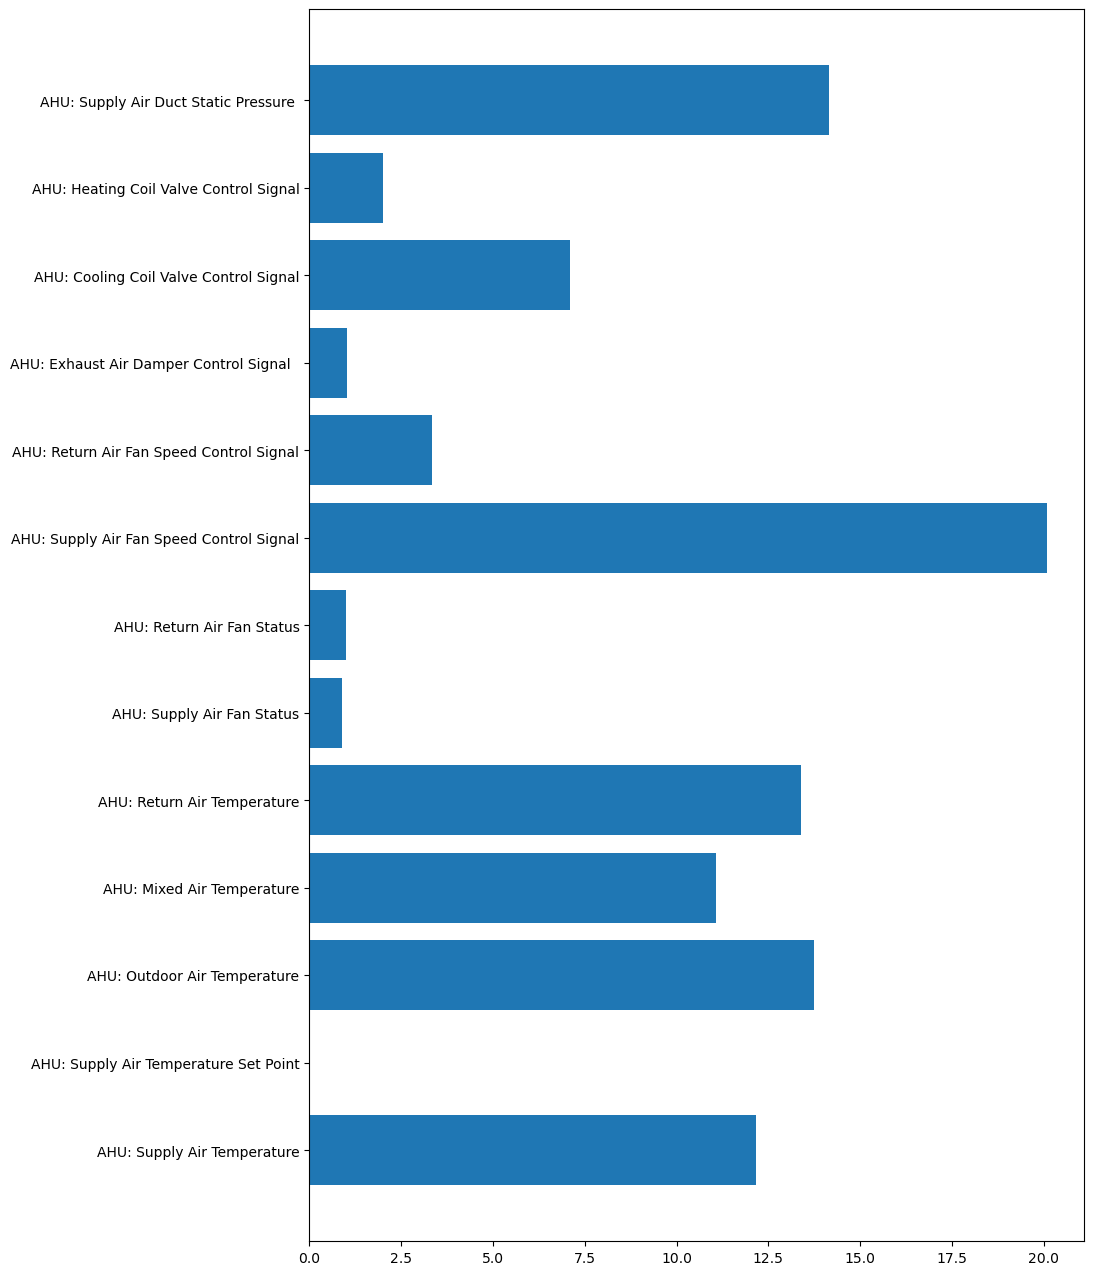

In [105]:
plt.figure(figsize=(10,16))
plt.barh(X_sim.columns, model_oa.get_feature_importance())

The above weights seem to be correct from the point of view of the system operation logic.

<BarContainer object of 13 artists>

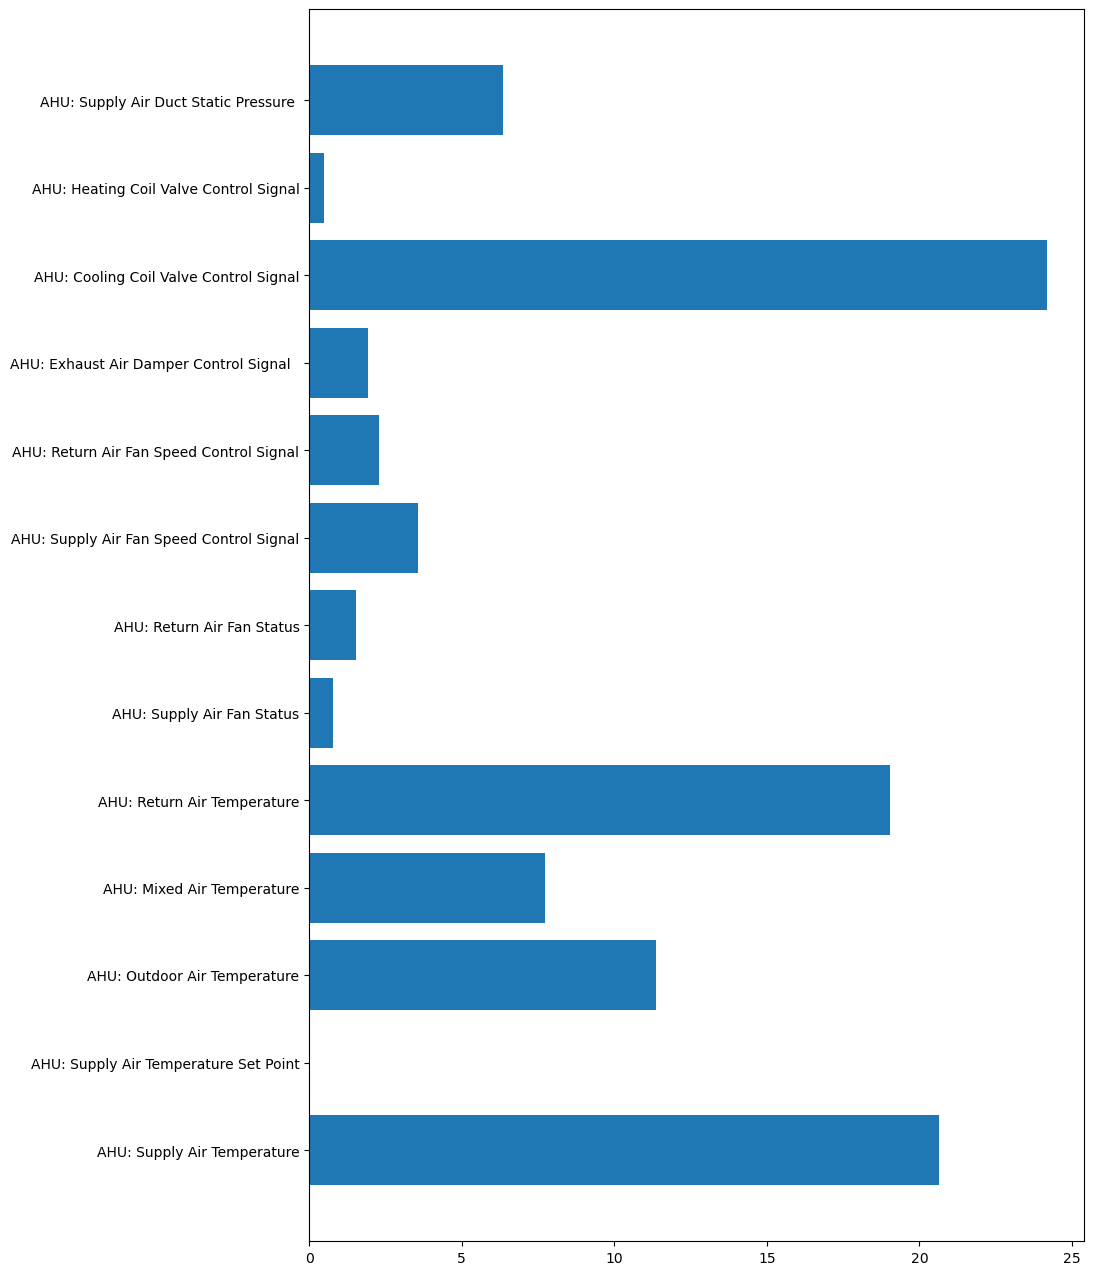

In [106]:
plt.figure(figsize=(10,16))
plt.barh(X_sim.columns, models_heat[4].get_feature_importance())

The above weights seem to be correct from the point of view of the system operation logic, but a bit diffrent than in a model build on experimental data.

<BarContainer object of 13 artists>

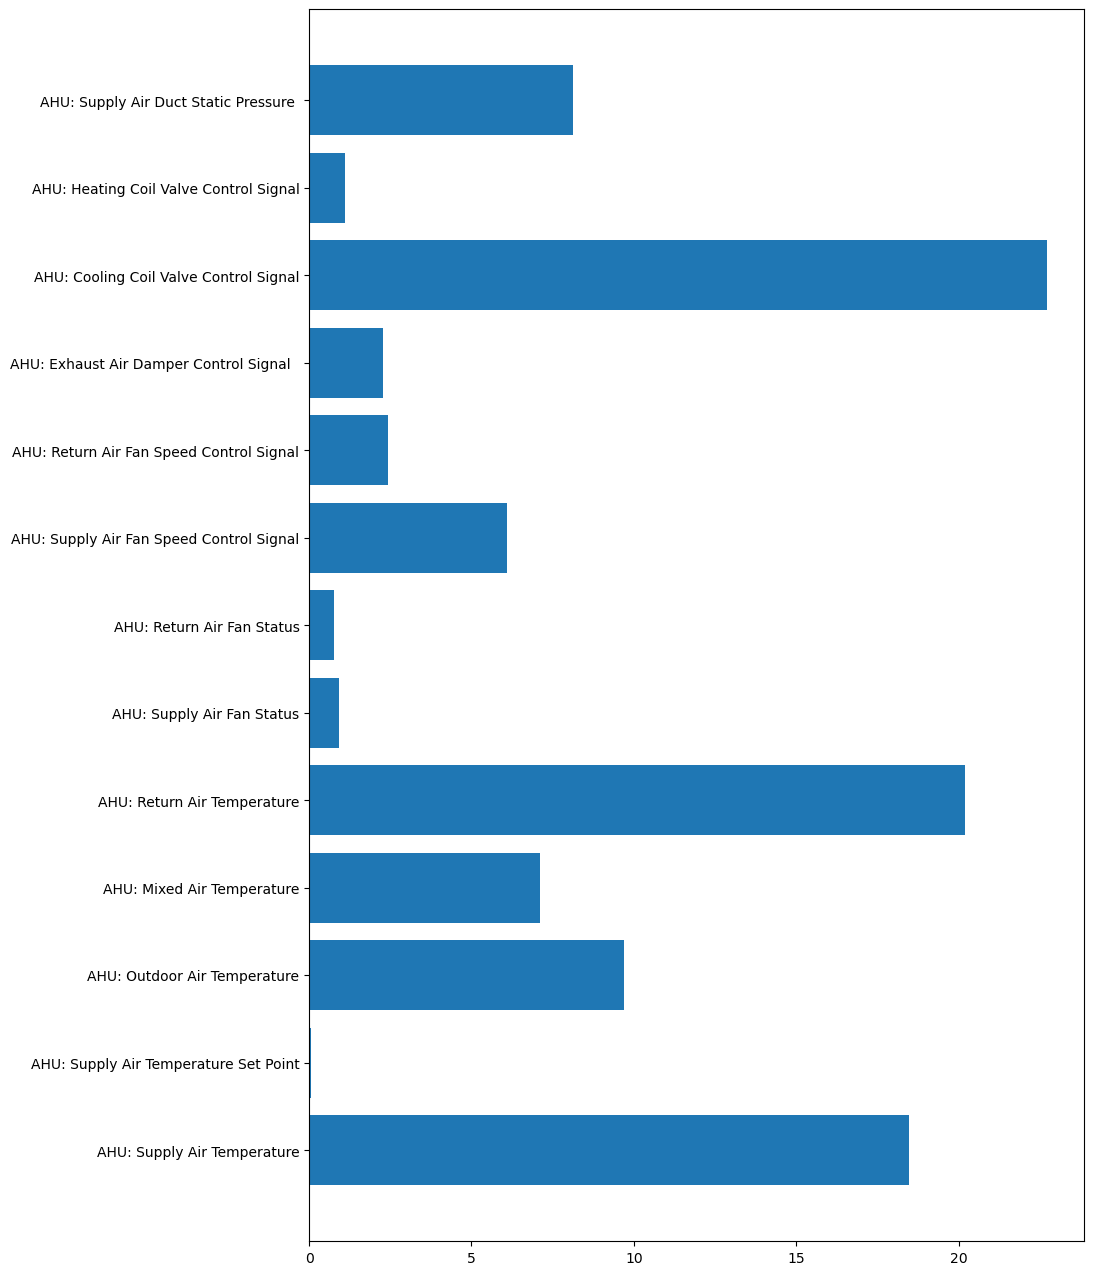

In [107]:
plt.figure(figsize=(10,16))
plt.barh(X_sim.columns, model_cool.get_feature_importance())

The above weights seem to be correct from the point of view of the system operation logic.

# Simulation and experimental model comparison

We currently have two types of models, based on data from another source. However, these models serve the same purpose of detecting leaky heating valve failures and apply to the same systems. We can then compare how the models will perform on other data.

## Experimental model on simulated data

In [163]:
Acc_exp_on_sim = pd.DataFrame(index=None, columns=['model','accuracy','precision','recall','f1'])

In [166]:
# Preparing feature data with columns from the experimental data model.
X_exp_on_sim = raw_data_sim[X_exp.columns]

In [164]:
for model in models_exp:
    name = str(model).split('Classifier')[0]
    y_pred = model.predict(X_exp_on_sim)
    acc = accuracy_score(y_heat, y_pred)
    prec = precision_score(y_heat, y_pred)    
    rec = recall_score(y_heat, y_pred)
    f1 = f1_score(y_heat, y_pred)
    
    Acc_exp_on_sim = Acc_exp_on_sim.append(pd.Series({'model':name,
                                'accuracy': acc,
                                'precision': prec,
                                'recall': rec,
                                'f1': f1}),ignore_index=True)

In [165]:
print(Acc_exp_on_sim)

                     model  accuracy  precision    recall        f1
0               KNeighbors  0.759749   0.277190  0.673148  0.392681
1                      MLP  0.431651   0.163418  0.953009  0.278996
2                 AdaBoost  0.555342   0.199288  0.945602  0.329197
3         GradientBoosting  0.574145   0.205692  0.940278  0.337544
4  <catboost.core.CatBoost  0.541293   0.189247  0.906019  0.313095
5                      XGB  0.575401   0.195294  0.858796  0.318223
6                  Bagging  0.570353   0.185771  0.805093  0.301884
7             RandomForest  0.569845   0.201177  0.918287  0.330047
8             DecisionTree  0.568269   0.188414  0.828935  0.307039
9     LogisticRegression()  0.521421   0.134777  0.580787  0.218783


As we can see all models predicted much worse especially when it comes to precision. Seems like models predicted much more faults than there were actually. All models performed similar so this drop in performance probably isn't because bad model training or preparation, but due to the fact that dependencies in experimental data are not exactly the same in simulated data. To check if this is the case we will check if this behaviour repeats in other scenario.

## Simulated model on experimental data

In [167]:
Acc_sim_on_exp = pd.DataFrame(index=None, columns=['model','accuracy','precision','recall','f1'])

In [168]:
# Preparing feature data with columns from the experimental data model.
X_sim_on_exp = raw_data_exp[X_sim.columns]

In [170]:
for model in models_heat:
    name = str(model).split('Classifier')[0]
    y_pred = model.predict(X_sim_on_exp)
    acc = accuracy_score(y_exp, y_pred)
    prec = precision_score(y_exp, y_pred)    
    rec = recall_score(y_exp, y_pred)
    f1 = f1_score(y_exp, y_pred)
    
    Acc_sim_on_exp = Acc_sim_on_exp.append(pd.Series({'model':name,
                                'accuracy': acc,
                                'precision': prec,
                                'recall': rec,
                                'f1': f1}),ignore_index=True)

In [171]:
print(Acc_sim_on_exp)

                     model  accuracy  precision    recall        f1
0               KNeighbors  0.819722   0.139403  0.068056  0.091461
1                      MLP  0.704074   0.220471  0.480903  0.302336
2                 AdaBoost  0.847593   0.054113  0.008681  0.014961
3         GradientBoosting  0.727454   0.220591  0.412153  0.287374
4  <catboost.core.CatBoost  0.839722   0.043887  0.009722  0.015918
5                      XGB  0.824213   0.024870  0.008333  0.012484
6                  Bagging  0.518380   0.154496  0.584028  0.244352
7             RandomForest  0.840000   0.269231  0.116667  0.162791
8             DecisionTree  0.524213   0.156624  0.585764  0.247161
9     LogisticRegression()  0.736250   0.252068  0.497222  0.334540


In this case models performed even worse which confirms earlier assumptions that the relationships in real data are not the same relationships in simulated data.

The final conclusion of this issue is that machine learning models can be used to detect faults in the system. 

However, it matters what data we use. With well-generated data, most models perform excellently even without much model fitting or data balancing.

Unfortunately, it looks like we can't use simulation data to train the model. Generating data in this way is admittedly much cheaper than with the experiment but, our model will be at best as good as the model used to simulate the data. So something like a model of a model is created but for the practical use we need model which is as close to reality as possible.